In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/leads-dataset/Leads.csv
/kaggle/input/leads-dataset/Leads Data Dictionary.xlsx
/kaggle/input/leads-dataset/image.jpg


In [2]:
# For Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing required libraries

import numpy as np  #for numerical computations
import pandas as pd  #for data manipulation

#defining display limits for rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',10000)
from IPython.core.display import display

#for making plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

#for statsmodel
import statsmodels.api as sm

In [4]:
#loading and reading data
lead_df = pd.read_csv('/kaggle/input/leads-dataset/Leads.csv')
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### Data Cleaning 
- Missing value treatment

In [5]:
#getting inforation about data types missing values
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
#checking shape of data i.e. no. of rows and columns
lead_df.shape

(9240, 37)

In [7]:
#getting sum of null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#calculating percentage missing values
percent_missing = lead_df.isnull().sum() * 100 / len(lead_df)
missing_value_df = pd.DataFrame({'column_name': lead_df.columns,'percent_missing': percent_missing})

In [9]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [10]:
missing_value_df

column_name  \
Prospect ID                                                                      Prospect ID   
I agree to pay the amount through cheque            I agree to pay the amount through cheque   
Get updates on DM Content                                          Get updates on DM Content   
Update me on Supply Chain Content                          Update me on Supply Chain Content   
Receive More Updates About Our Courses                Receive More Updates About Our Courses   
Through Recommendations                                              Through Recommendations   
Digital Advertisement                                                  Digital Advertisement   
Newspaper                                                                          Newspaper   
X Education Forums                                                        X Education Forums   
A free copy of Mastering The Interview                A free copy of Mastering The Interview   
Magazine                                                                            Magazine   
Search                                                                                Search   
Newspaper Article                                                          Newspaper Article   
Last Notable Activity                                                  Last Notable Activity   
Lead Number                                                                      Lead Number   
Lead Origin                                                                      Lead Origin   
Total Time Spent on Website                                      Total Time Spent on Website   
Converted                                                                          Converted   
Do Not Call                                                                      Do Not Call   
Do Not Email                                                                    Do Not Email   
Lead Source                                                                      Lead Source   
Last Activity                                                                  Last Activity   
Page Views Per Visit                                                    Page Views Per Visit   
TotalVisits                                                                      TotalVisits   
City                                                                                    City   
Specialization                                                                Specialization   
How did you hear about X Education                        How did you hear about X Education   
Country                                                                              Country   
What is your current occupation                              What is your current occupation   
Lead Profile                                                                    Lead Profile   
What matters most to you in choosing a course  What matters most to you in choosing a course   
Tags                                                                                    Tags   
Asymmetrique Activity Index                                      Asymmetrique Activity Index   
Asymmetrique Profile Index                                        Asymmetrique Profile Index   
Asymmetrique Activity Score                                      Asymmetrique Activity Score   
Asymmetrique Profile Score                                        Asymmetrique Profile Score   
Lead Quality                                                                    Lead Quality   

                                               percent_missing  
Prospect ID                                           0.000000  
I agree to pay the amount through cheque              0.000000  
Get updates on DM Content                             0.000000  
Update me on Supply Chain Content                     0.000000  
Receive More Updates About Our Courses                0.000000  
Through Recommendations                   

Since no column has more than 80% missing values, we can proceed with checking others.

In [11]:
#describing data, min, max, counts and mean values of numerical columns
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [12]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
lead = lead_df.dropna()

In [14]:
#checking how many data is lossed after dropping NaN values
lead.shape

(1943, 37)

It Can be seen that we are loosing almost all rows of data by just dropping NaN values. So missing value imputation is required.

In [15]:
lead2 = lead_df.dropna(subset=['How did you hear about X Education', 'What is your current occupation',
                              'What matters most to you in choosing a course',
                             'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                             'Asymmetrique Profile Score'])
lead2.shape

(3578, 37)

In [16]:
scores = lead_df.dropna(axis='columns')

In [17]:
scores.shape

(9240, 20)

In [18]:
scores.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Do Not Email',
       'Do Not Call', 'Converted', 'Total Time Spent on Website', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
3578/9240 *100

38.722943722943725

By dropping columns and subset of null values wer are loosing more than 60% of rows and 16 columns out of 37 which may be important. So missing values impution is needed.

Since, there are lot of columns with missing values. There are some columns which has missing values around or more than 50%. Other columns has significantly less missing value.

### Column Lead Quality

In [20]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Lead Quality has the highest % of missing values

In [21]:
lead_df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

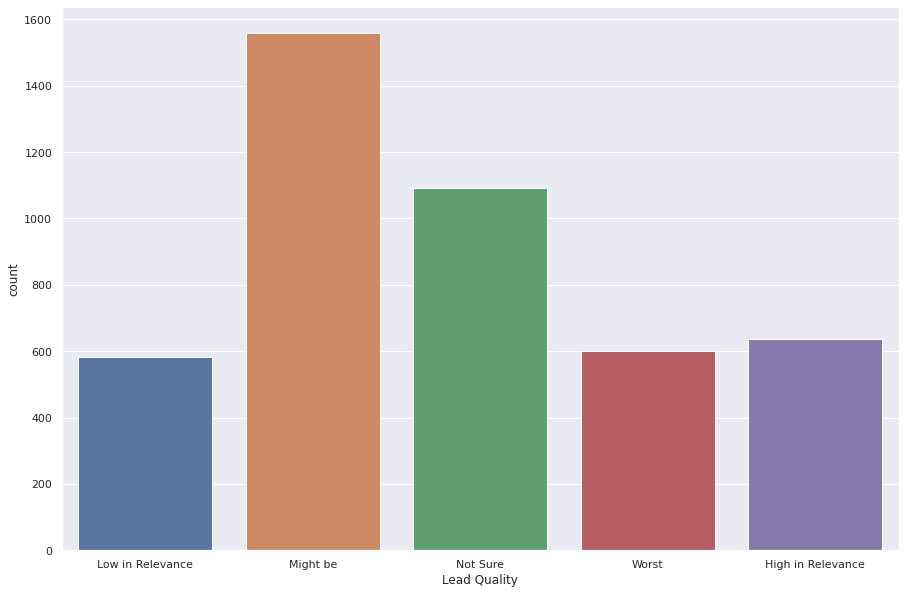

In [22]:
fig = plt.figure(figsize = (15,10))
sns. countplot(lead_df['Lead Quality'])

Lead quality indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. So may be employee has left not sure as NaN

In [23]:
#Replacing Missing values

lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan,'Not Sure')
lead_df['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

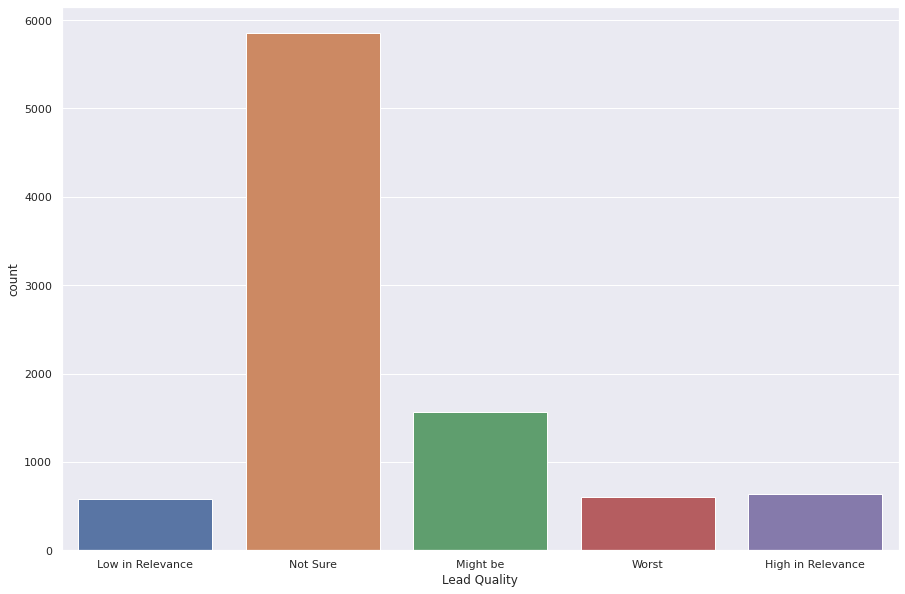

In [24]:
#Visualising after replacing missing values

plt.figure(figsize=(15,10))
sns.countplot(lead_df['Lead Quality'])

In [25]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Columns Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score

In [26]:
print(lead_df['Asymmetrique Activity Index'].describe())
print(lead_df['Asymmetrique Profile Index'].describe())
print(lead_df['Asymmetrique Activity Score'].describe())
print(lead_df['Asymmetrique Profile Score'].describe())

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object
count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object
count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64
count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64


*Need to check Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score*

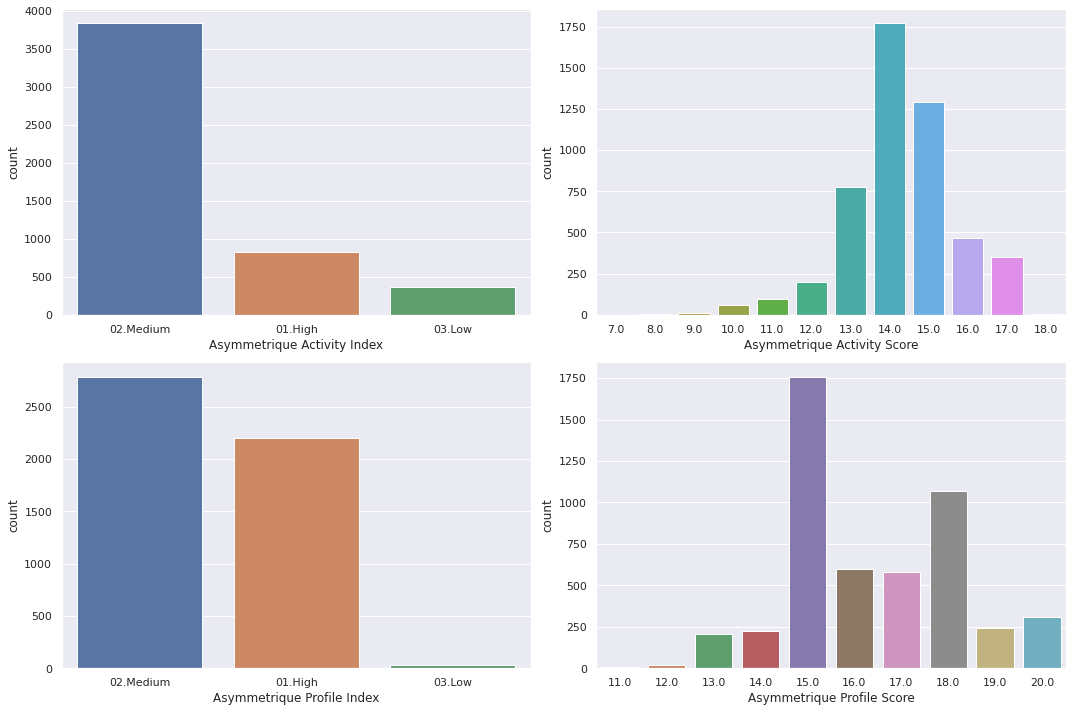

In [27]:
fig, axs = plt.subplots(2,2, figsize = (15,10))
plt1 = sns.countplot(lead_df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.countplot(lead_df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead_df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.countplot(lead_df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

With no significance and high null values, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score must be removed

In [28]:
lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [29]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Tags is the next variable with highest % of null values

In [30]:
lead_df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

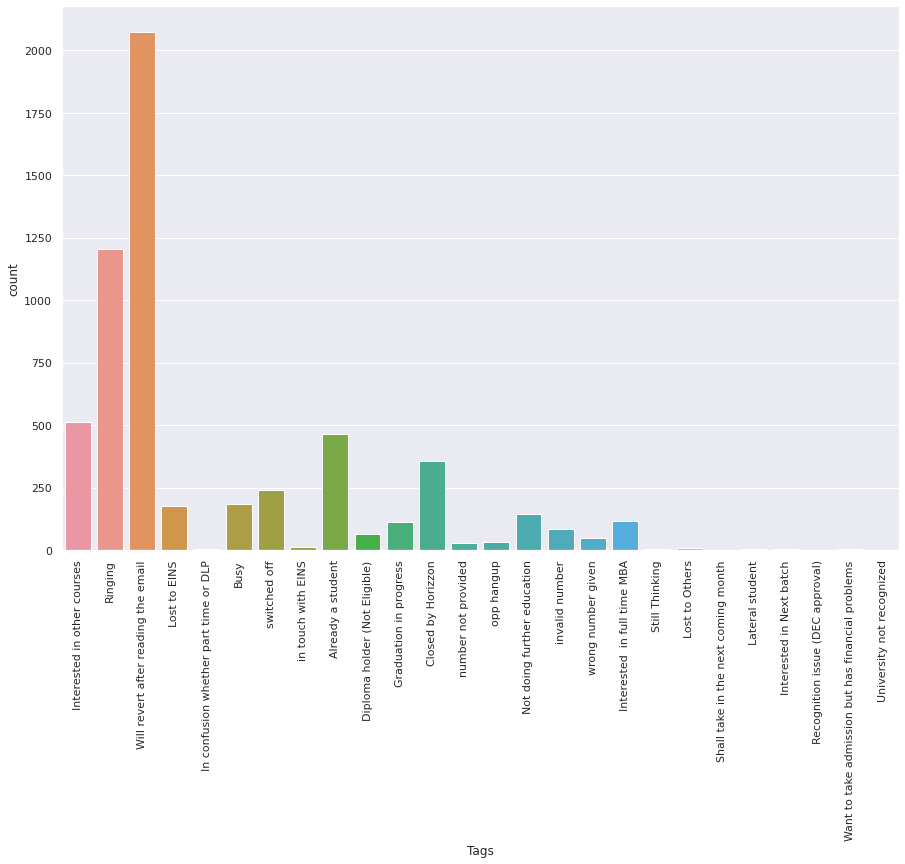

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['Tags'])
plt.xticks(rotation = 90)

Since 'Will revert after reading the email' has the highest count, the missing values can be imputed by the same.

In [32]:
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'Will revert after reading the email')
lead_df['Tags'].describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

In [33]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Column What matters most to you in choosing a course

In [34]:
lead_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

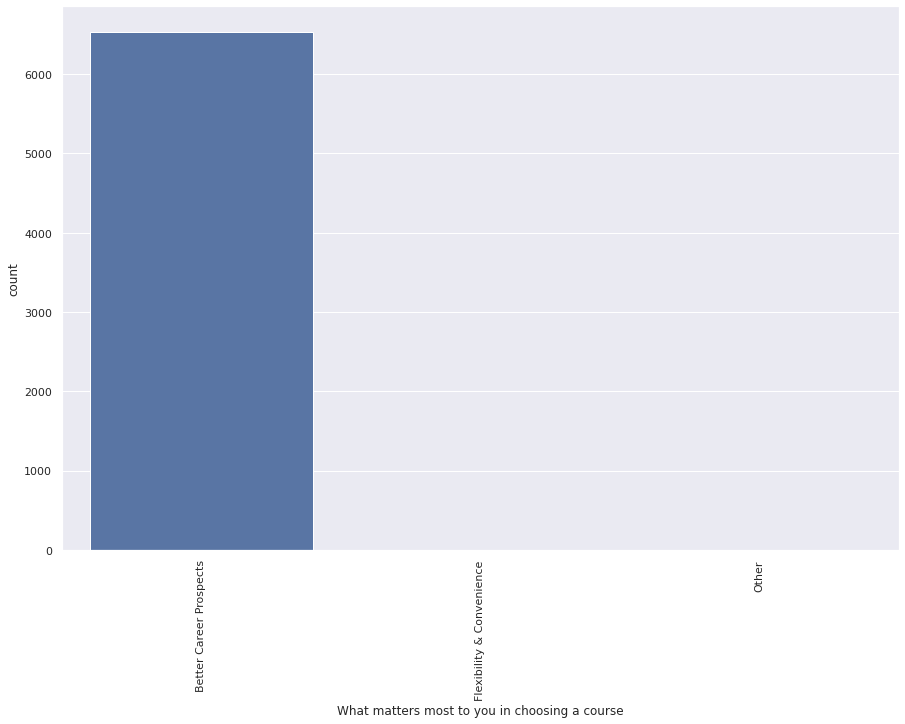

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)

Since 'What matters most to you in choosing a course' has the highest count, the missing values can be imputed by the same.

In [36]:
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [37]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Column Lead Profile

In [38]:
lead_df['Lead Profile'].describe()

count       6531
unique         6
top       Select
freq        4146
Name: Lead Profile, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

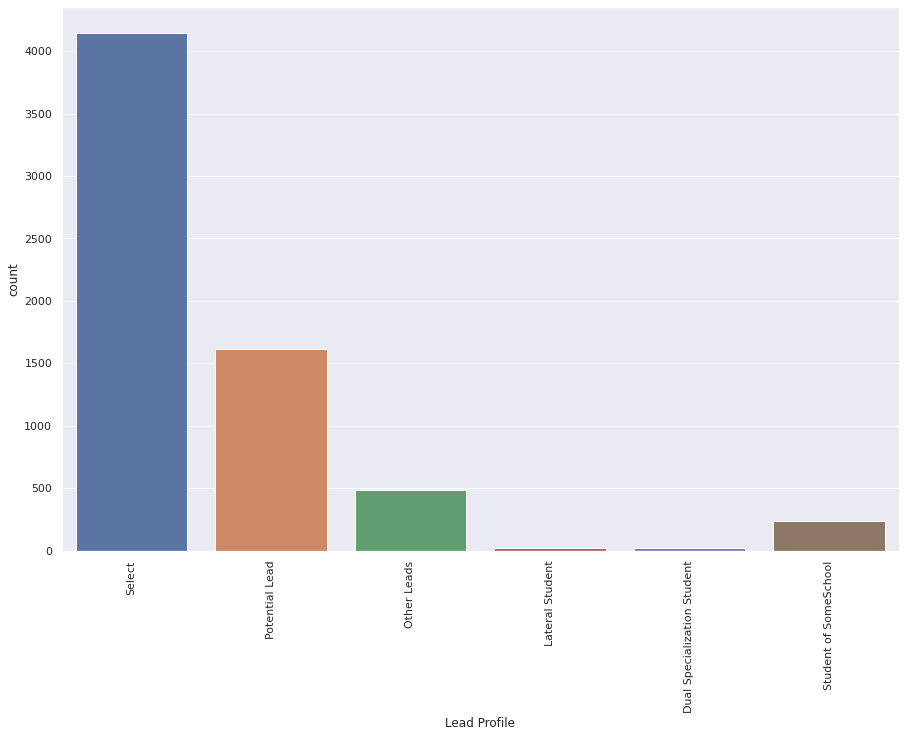

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['Lead Profile'])
plt.xticks(rotation = 90)

In [40]:
lead_df['Lead Profile']= lead_df['Lead Profile'].replace(np.nan,'Select')

In [41]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Next up - What is your current occupation

In [42]:
lead_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

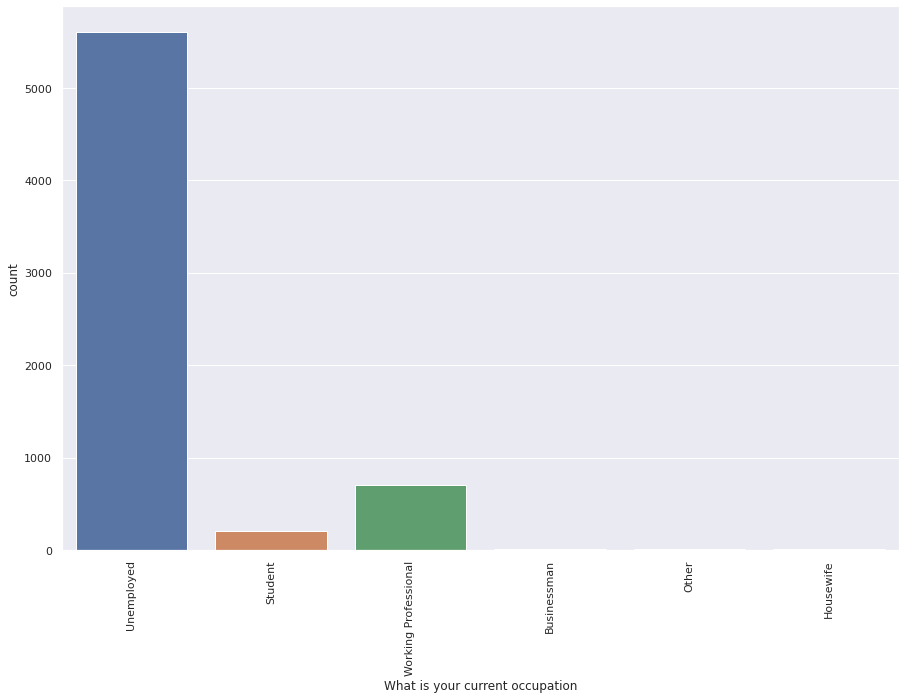

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['What is your current occupation'])
plt.xticks(rotation = 90)

In [44]:
#replacing null values with the mode
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [45]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [46]:
lead_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

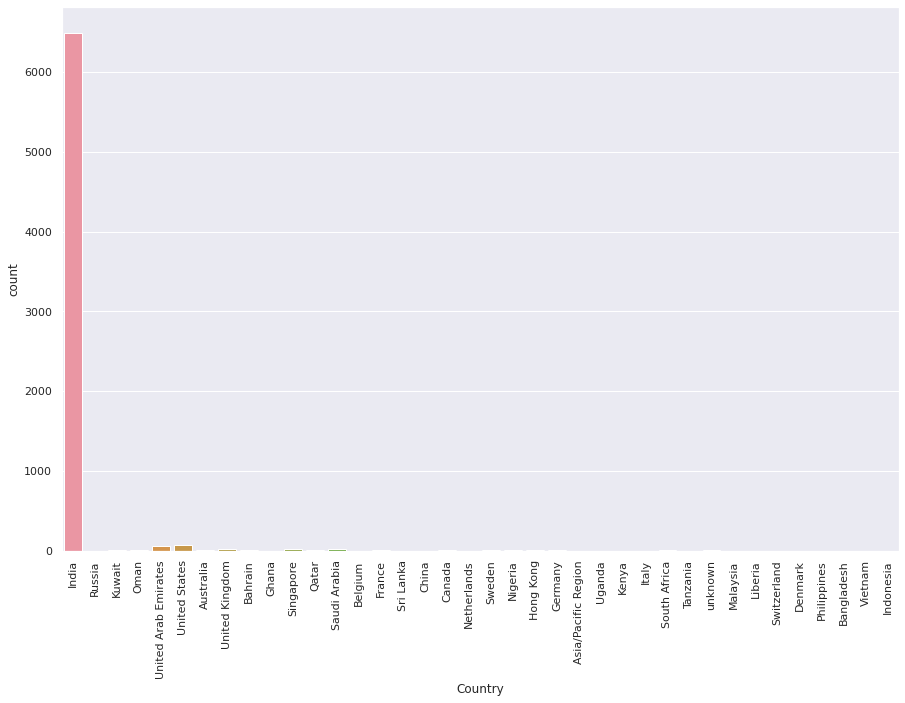

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['Country'])
plt.xticks(rotation = 90)

In [48]:
#replacing null values with the mode
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

In [49]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [50]:
lead_df['How did you hear about X Education'].describe()

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

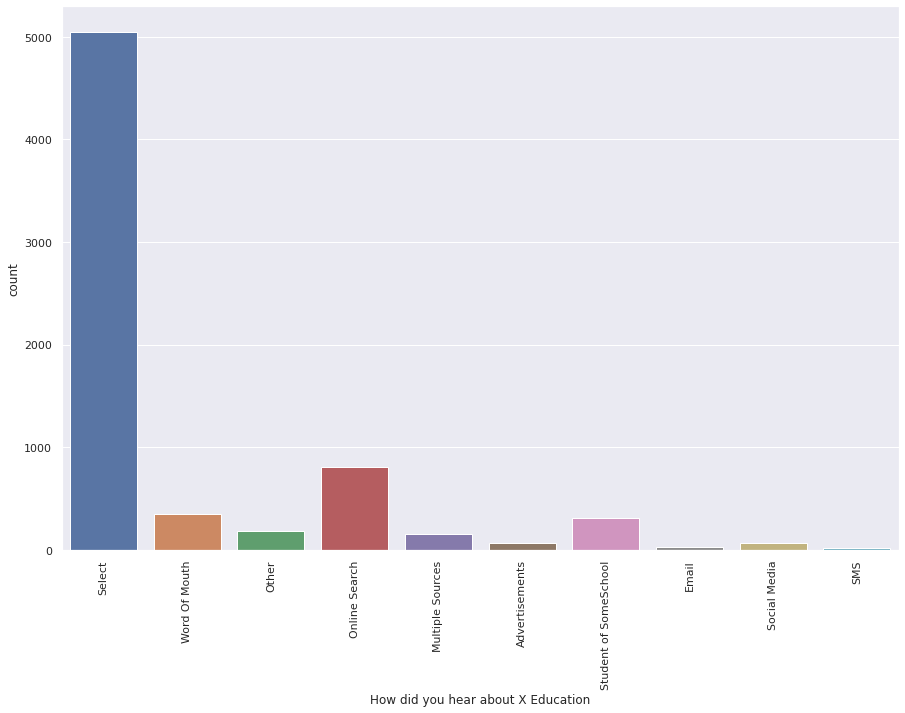

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['How did you hear about X Education'])
plt.xticks(rotation = 90)

Since majority of them have not selected How did you hear about X Education and another major chunk having null values, this column can be dropped.

In [52]:
lead_df = lead_df.drop(['How did you hear about X Education'],1)

In [53]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   15.56
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [54]:
lead_df['Specialization'].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

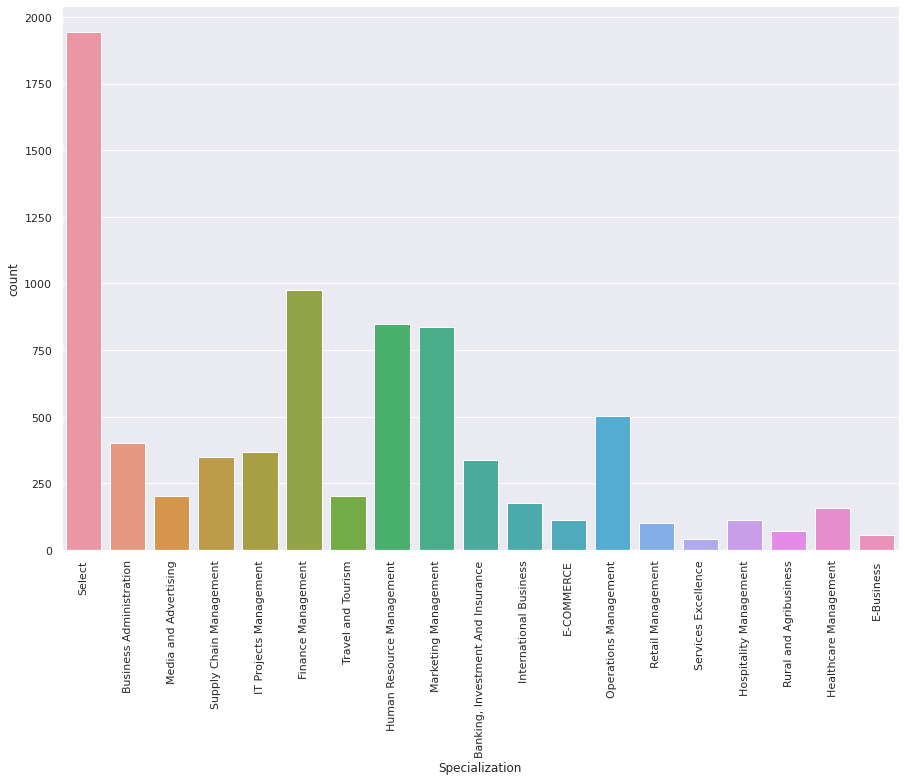

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation = 90)

Since majority of them have not selected their specialization and another major chunk having null values, this column can be dropped.

In [56]:
#replacing null and missing values with the mode
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')
lead_df['Specialization'] = lead_df['Specialization'].replace('Select', 'Others')

In [57]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Column City

In [58]:
lead_df['City'].describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

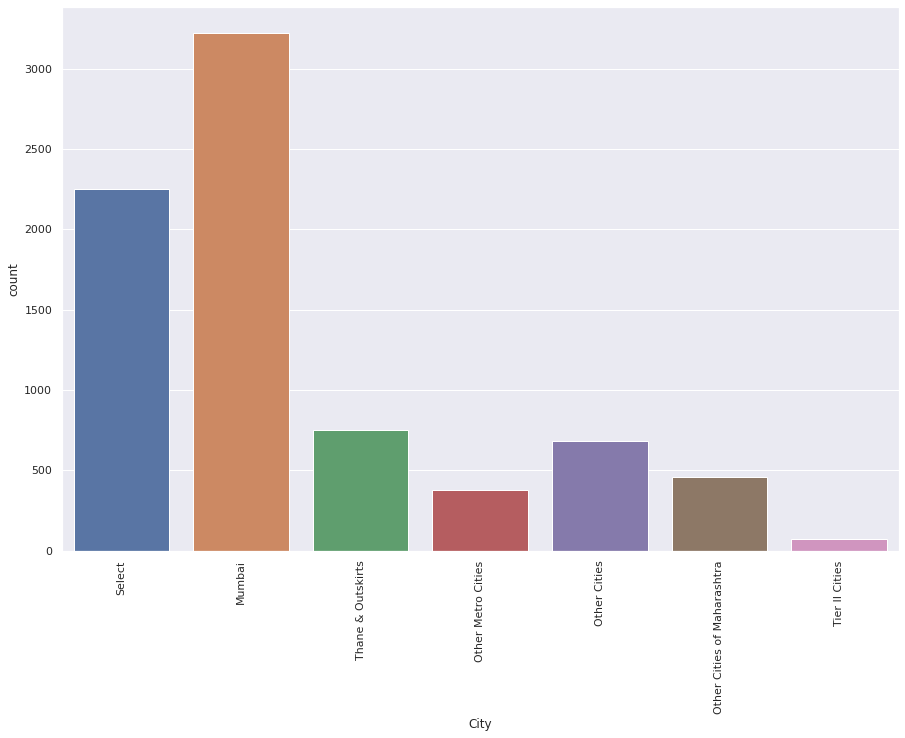

In [59]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df['City'])
plt.xticks(rotation = 90)

Select and nulls can be replaced by Mumbai since it is already in majority for cities.

In [60]:
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')
lead_df['City'] = lead_df['City'].replace('Select','Mumbai')

In [61]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [62]:
# Rest missing values are under 2% so we can drop these rows.
lead_df.dropna(inplace = True)

In [63]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

***Now We have cleaned the data and further analysis can be done***

### Exploratory Data Analytics

In [64]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India                   Others                      Unemployed   
1   India                   Others                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                   Others                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Mumbai                                       No   

In [65]:
#Finding leads conversion rate 
conversion_rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index)) * 100
conversion_rate

37.85541106458012

37.85 is the conversion rate of the leads

### Now checking the impact of every variable to successful lead conversions

In [66]:
lead_df['Lead Origin'].describe()

count                        9074
unique                          4
top       Landing Page Submission
freq                         4885
Name: Lead Origin, dtype: object

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

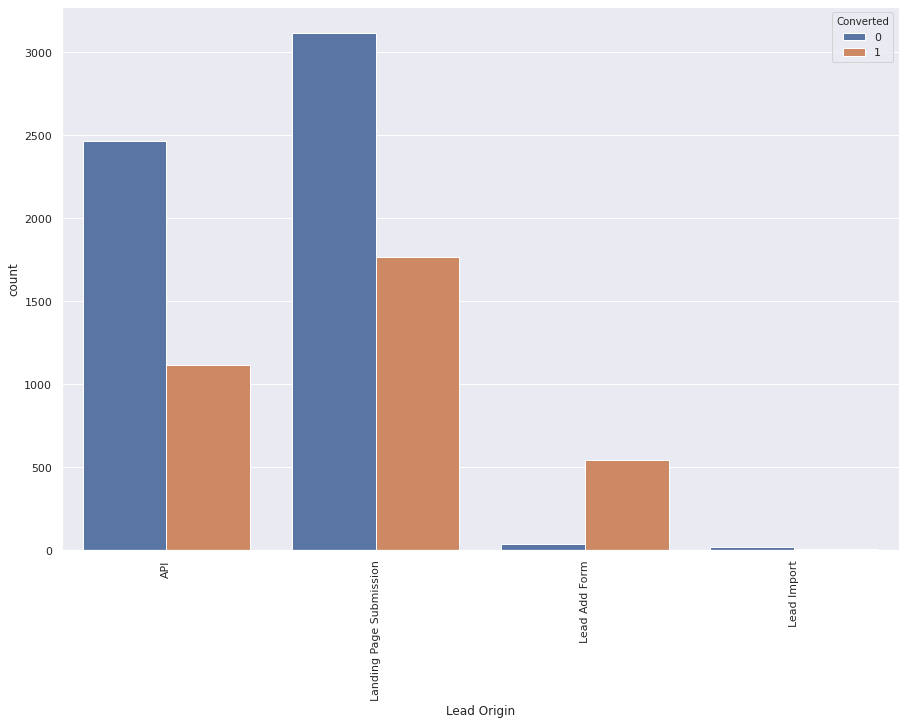

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

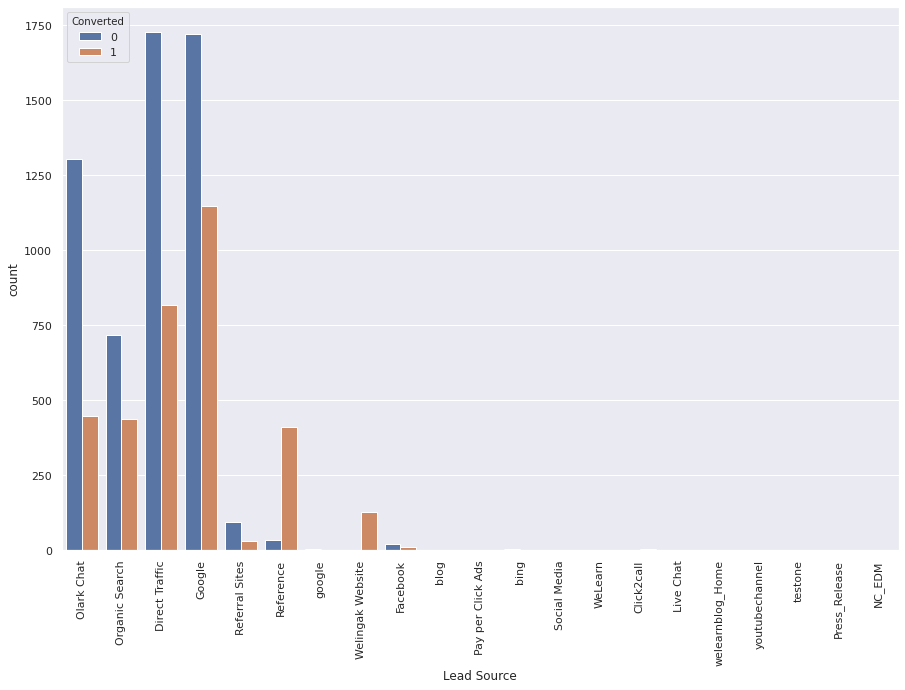

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

As we can see most of the leads comes from Google, Organic Search, Olark Chat, Referals etc. Replacing less used platforms by other_sources

In [69]:
lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [70]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
                                                         'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
                                                         'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Other_source')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

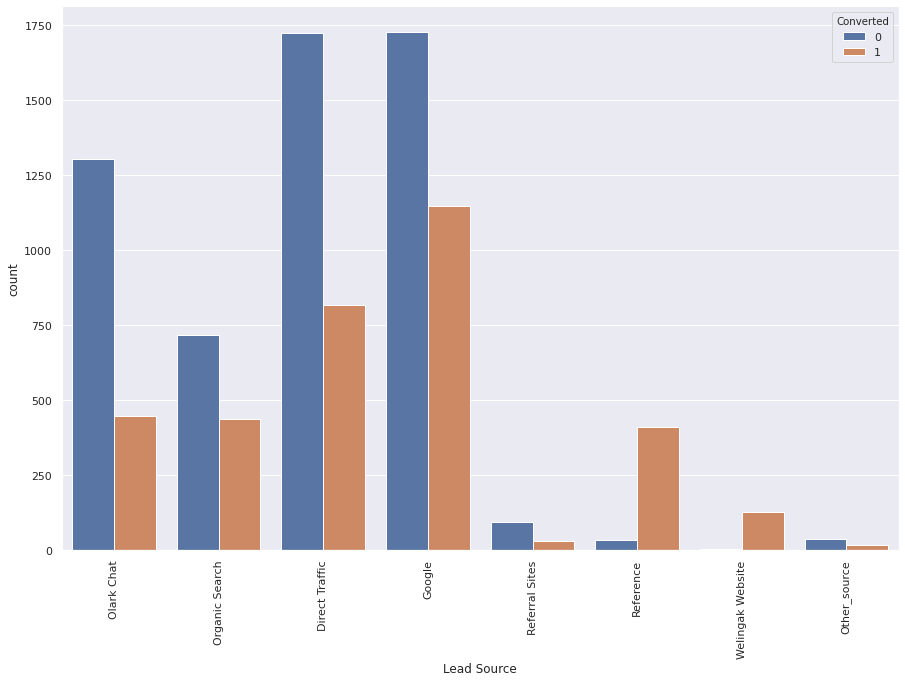

In [71]:
# Visualising after replacement

plt.figure(figsize=(15,10))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [72]:
lead_df['Do Not Email'].describe()

count     9074
unique       2
top         No
freq      8358
Name: Do Not Email, dtype: object

In [73]:
lead_df['Do Not Call'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Do Not Call, dtype: object

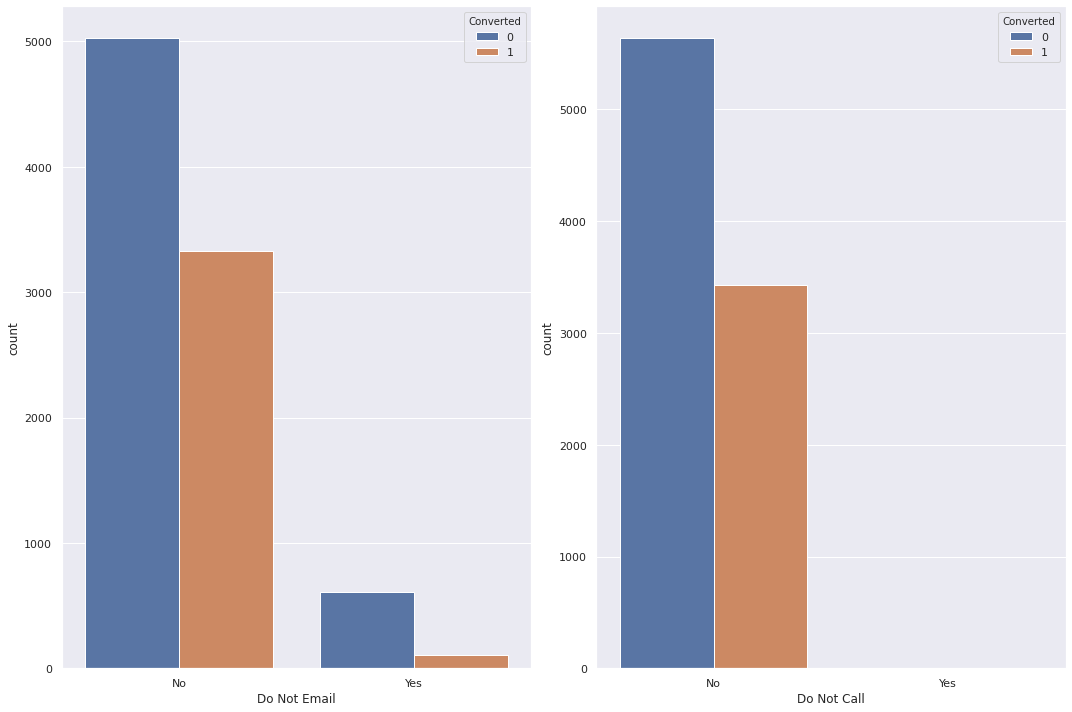

In [74]:
fig, axs = plt.subplots(1,2, figsize = (15,10))
plt1 = sns.countplot(lead_df['Do Not Email'], hue = lead_df["Converted"], ax = axs[0])
plt2 = sns.countplot(lead_df['Do Not Call'], hue = lead_df["Converted"], ax = axs[1])
plt.tight_layout()

In [75]:
#treating binary variables
var_list = ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

lead_df[var_list] = lead_df[var_list].apply(binary_map)

In [76]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India                   Others                      Unemployed   
1   India                   Others                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                   Others                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Mumbai                                

### Data Prepration 
- Detecting Outliers and treatment

In [77]:
lead_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

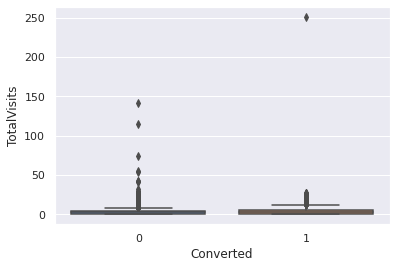

In [78]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

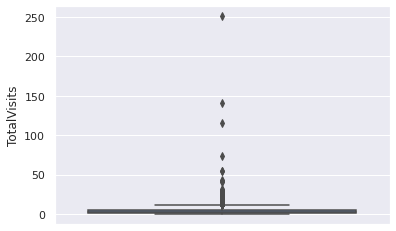

In [79]:
sns.boxplot(y = 'TotalVisits', data = lead_df)

The above variables have some outliers which needs to be taken care of

In [80]:
#treating outliers
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

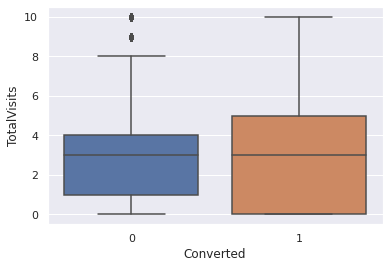

In [81]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

In [82]:
lead_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

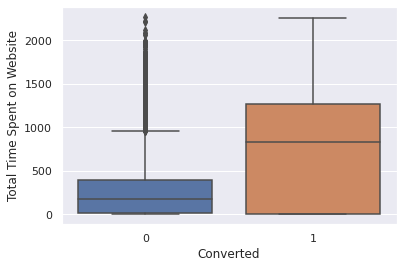

In [83]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)

In [84]:
#treating outliers
percentiles = lead_df['Total Time Spent on Website'].quantile([0.05,0.95]).values
lead_df['Total Time Spent on Website'][lead_df['Total Time Spent on Website'] <= percentiles[0]] = percentiles[0]
lead_df['Total Time Spent on Website'][lead_df['Total Time Spent on Website'] >= percentiles[1]] = percentiles[1]

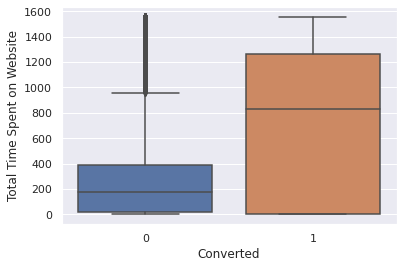

In [85]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)

In [86]:
lead_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

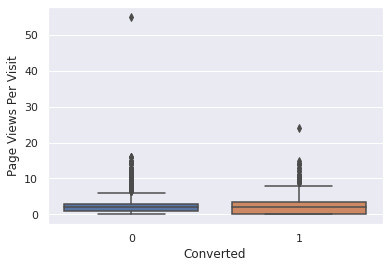

In [87]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)

In [88]:
#treating outliers
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

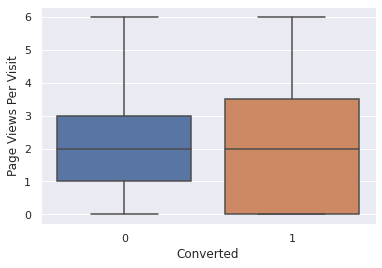

In [89]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)

In [90]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India                   Others                      Unemployed   
1   India                   Others                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                   Others                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Mumbai                                

### Identifying conversion of variables into promissing leads

In [91]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

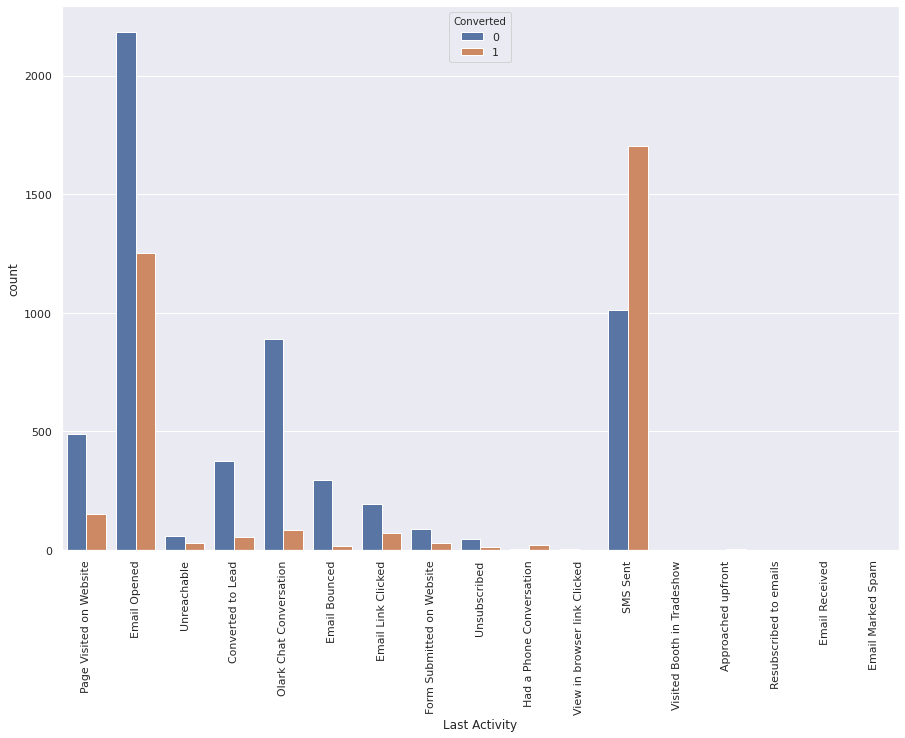

In [92]:
#Visualising Conversion of last activity feature

plt.figure(figsize=(15,10))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [93]:
lead_df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [94]:
#replacing the lower count values as others
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_LastActivity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

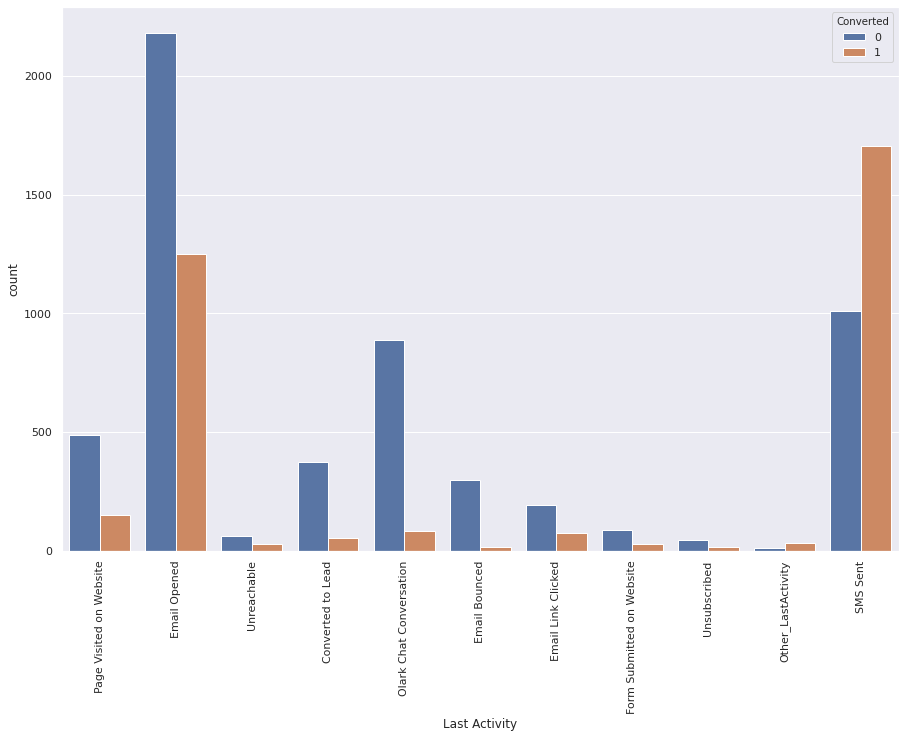

In [95]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [96]:
#Column Country
lead_df['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

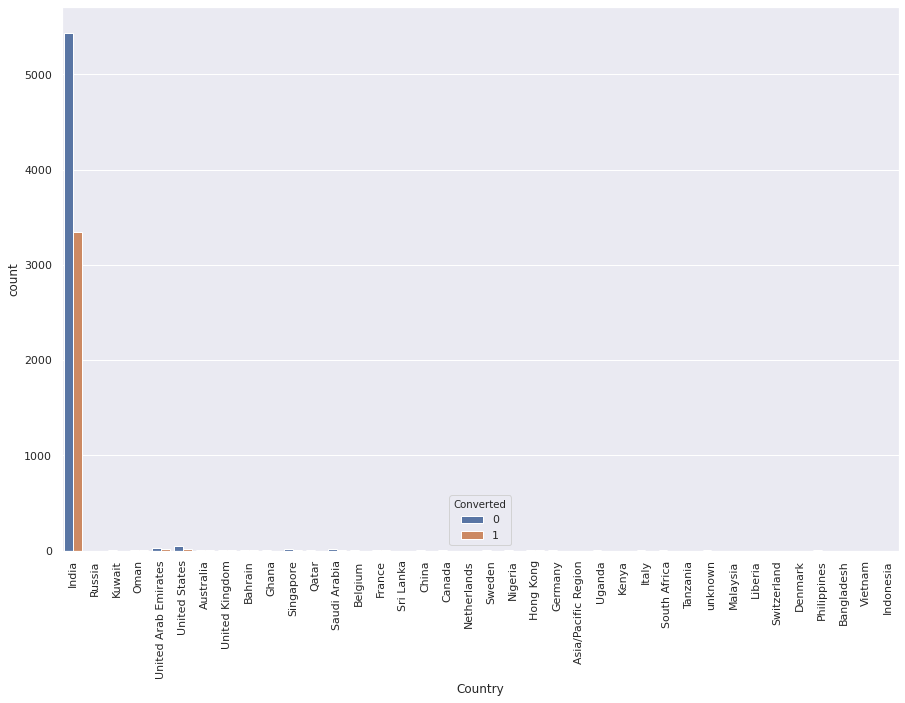

In [97]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Country", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [98]:
lead_df['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

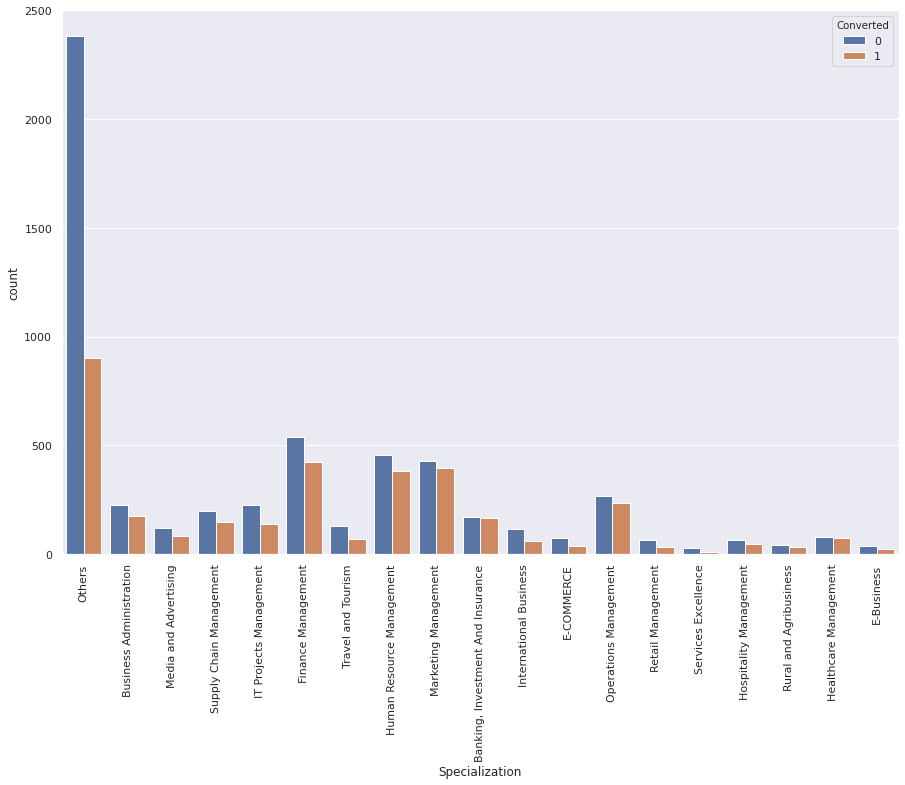

In [99]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [100]:
lead_df['Specialization'] = lead_df['Specialization'].replace(['Others'], 'Other_Specialization')

In [101]:
lead_df['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

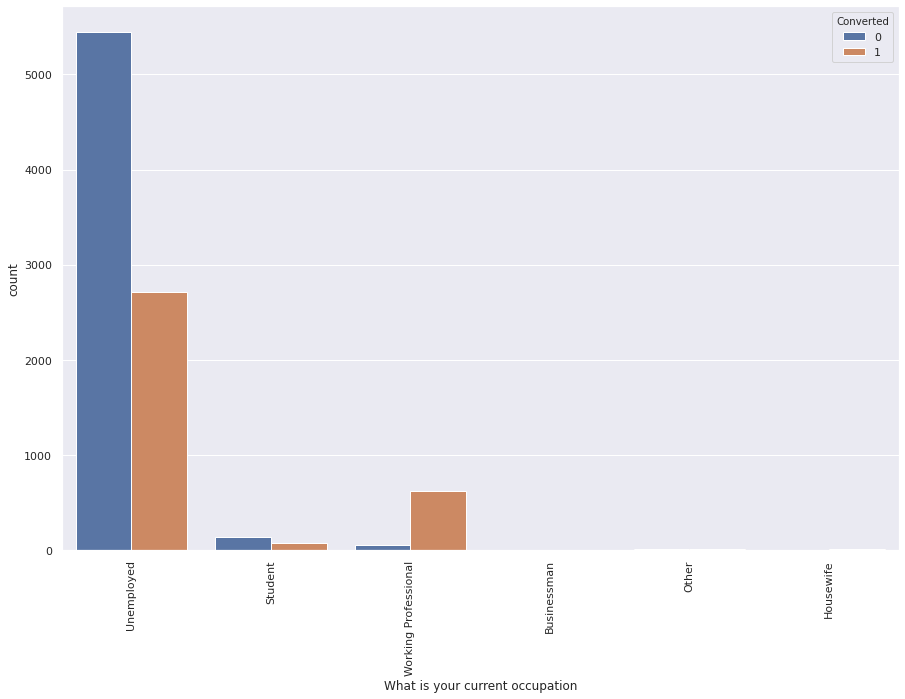

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [103]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Others'], 'Other_Occupation')

In [104]:
lead_df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

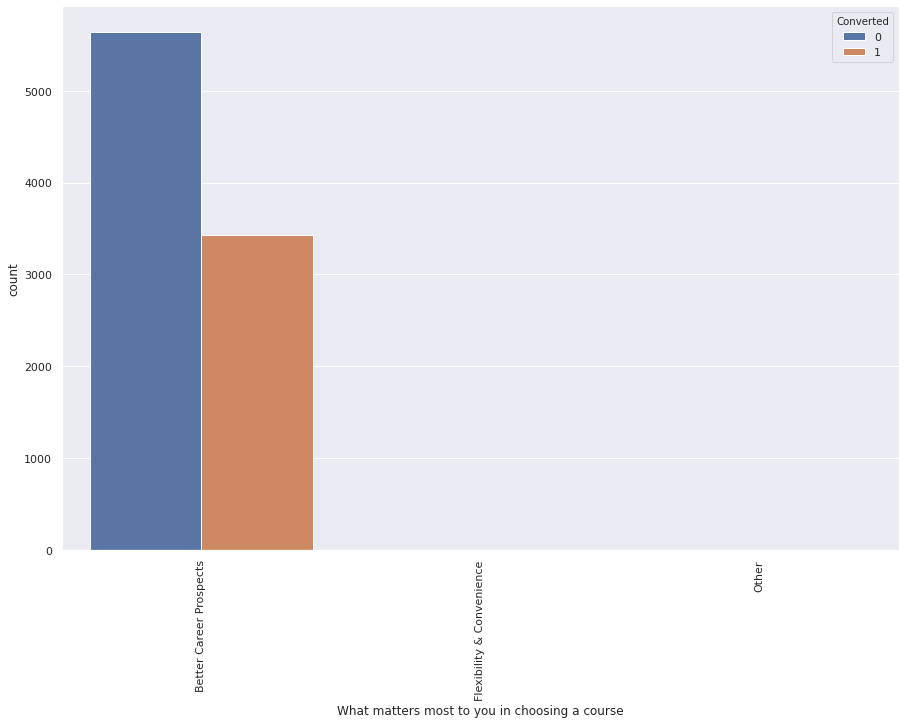

In [105]:
plt.figure(figsize=(15,10))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [106]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India     Other_Specialization                      Unemployed   
1   India     Other_Specialization                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India     Other_Specialization                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Mumbai                                

In [107]:
#Inpecting columns again and if required any treatment will treat them.

In [108]:
lead_df['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [109]:
lead_df['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [110]:
lead_df['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [111]:
lead_df['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [112]:
lead_df['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [113]:
lead_df['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [114]:
lead_df['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [115]:
lead_df['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [116]:
lead_df['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

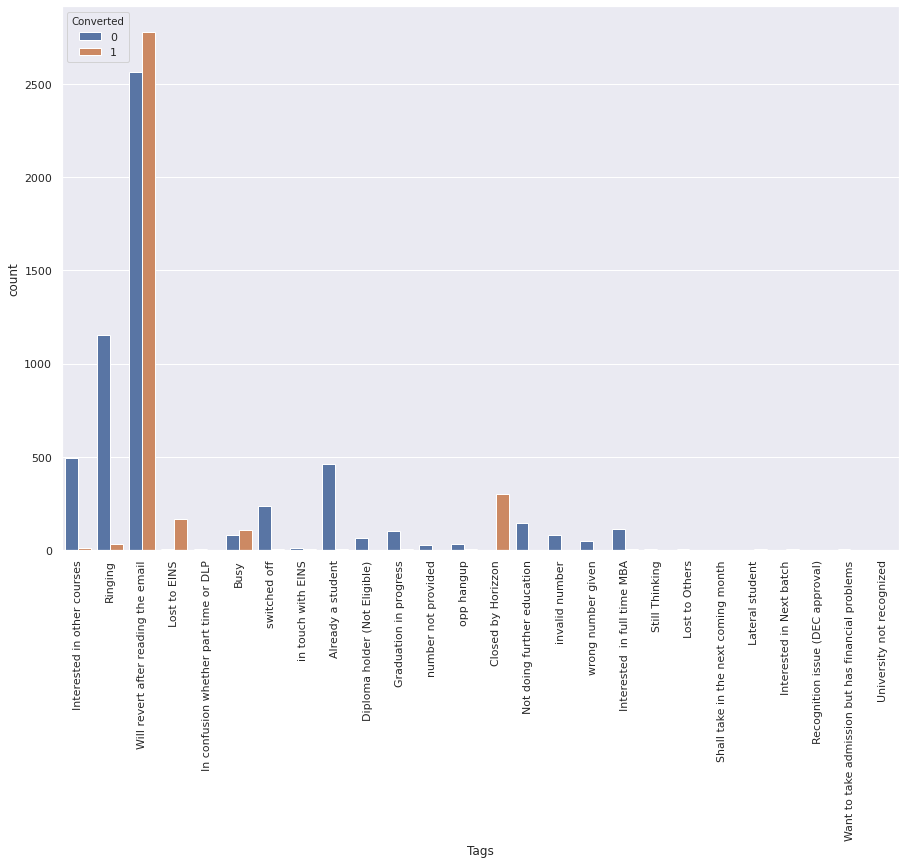

In [117]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [118]:
lead_df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [119]:
#replacing the lower count values as others
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

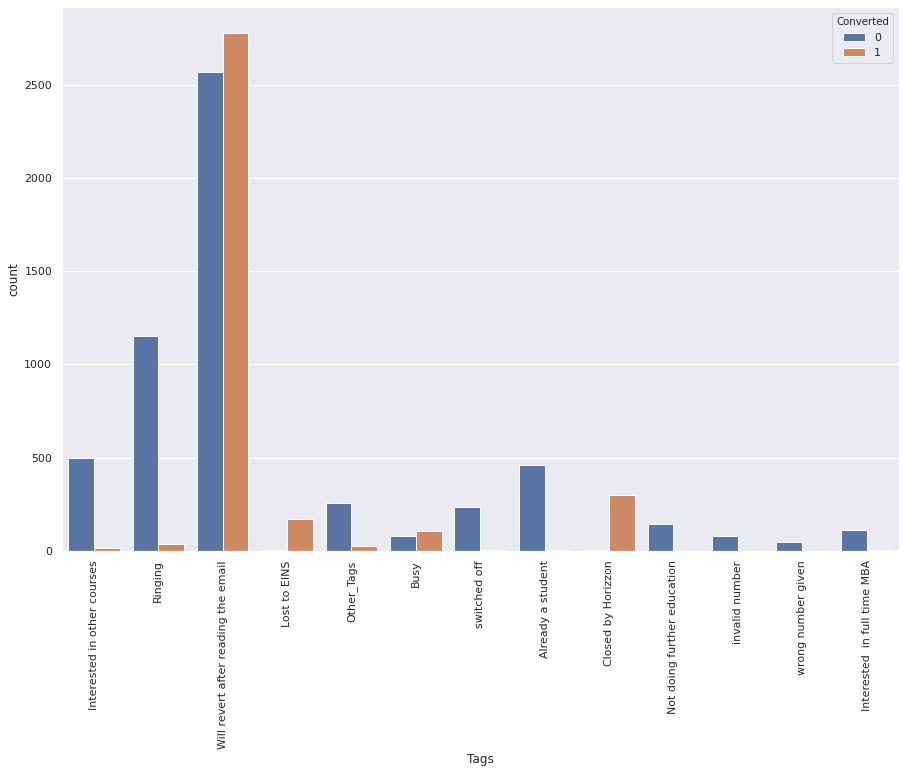

In [120]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [121]:
lead_df['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

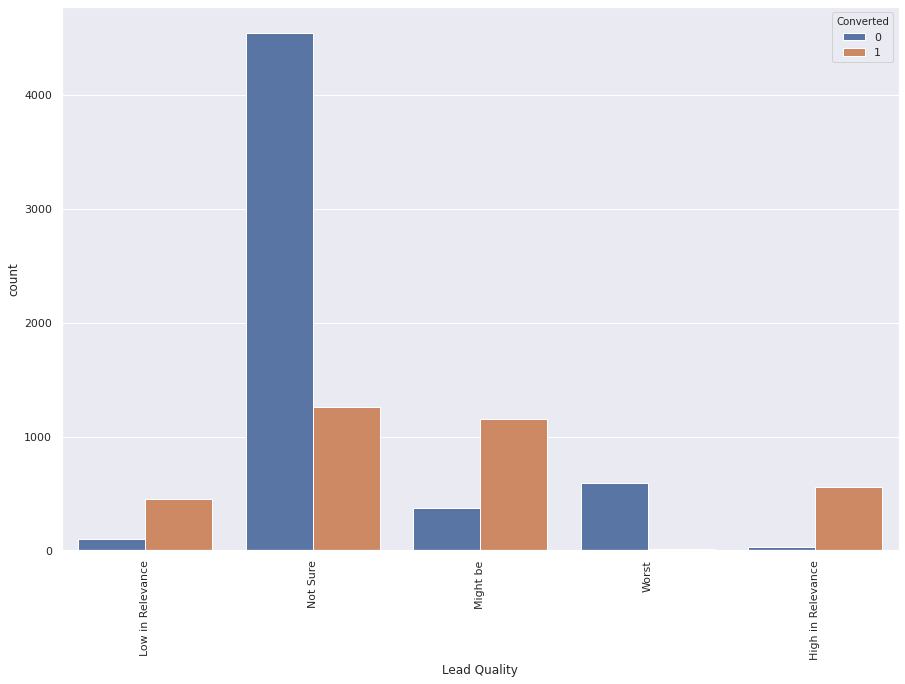

In [122]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [123]:
lead_df['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [124]:
lead_df['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [125]:
lead_df['Lead Profile'].describe()

count       9074
unique         6
top       Select
freq        6757
Name: Lead Profile, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

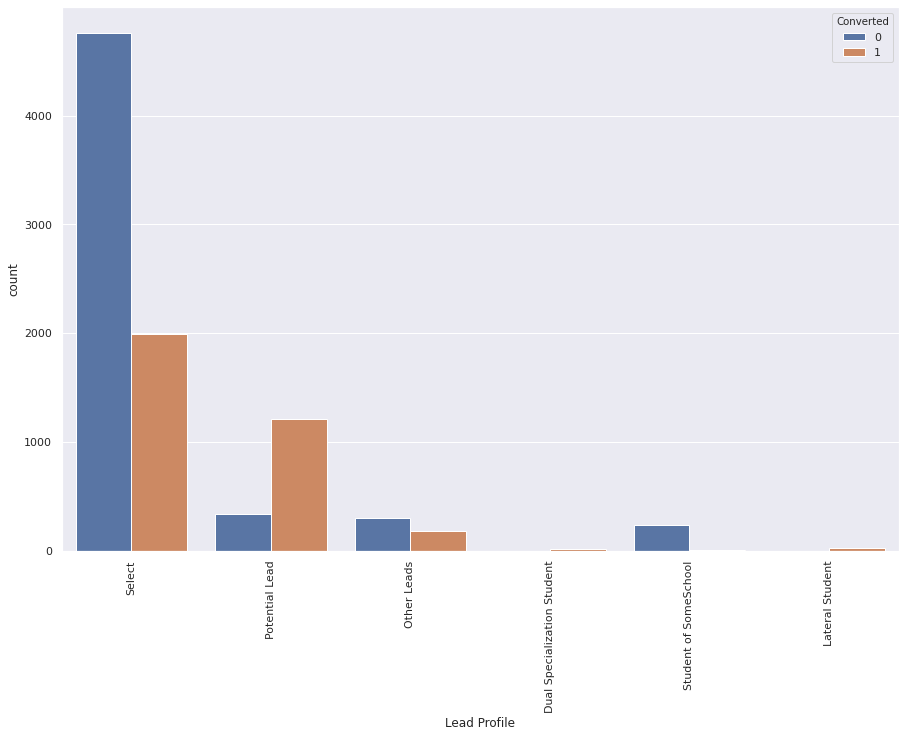

In [126]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Lead Profile", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [127]:
lead_df['Lead Profile'] = lead_df['Lead Profile'].replace('Select', 'LeadProfile_NotSure')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

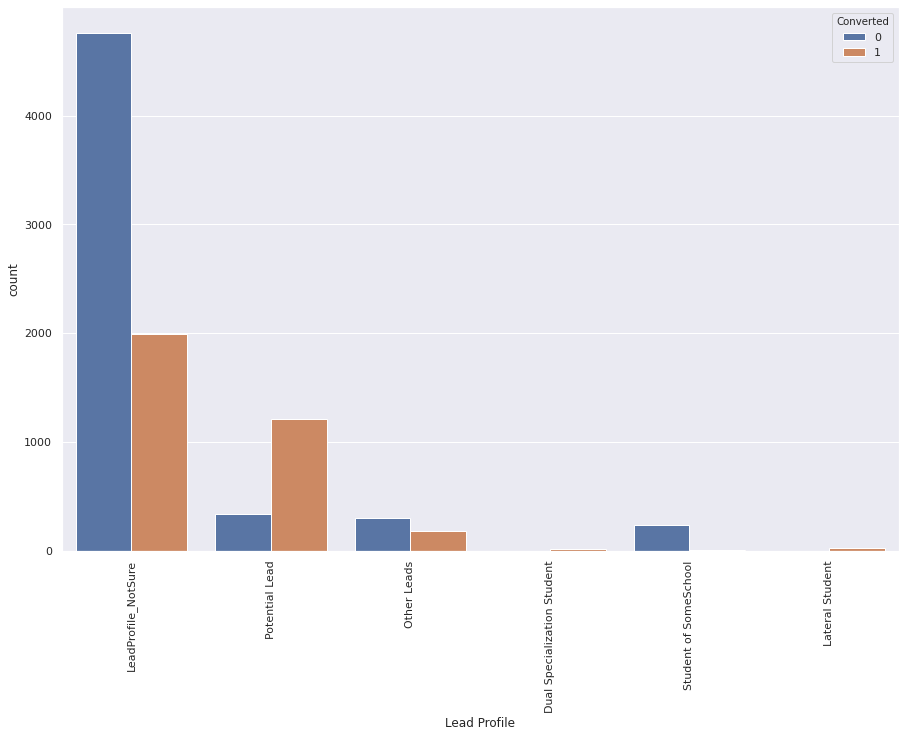

In [128]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Lead Profile", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [129]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India     Other_Specialization                      Unemployed   
1   India     Other_Specialization                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India     Other_Specialization                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

          Lead Profile    City I agree to pay the amount through cheque  \
0  LeadProfile_NotSure  Mumbai                                       No   
1  LeadProfile_NotSure  Mumbai           

In [130]:
lead_df['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

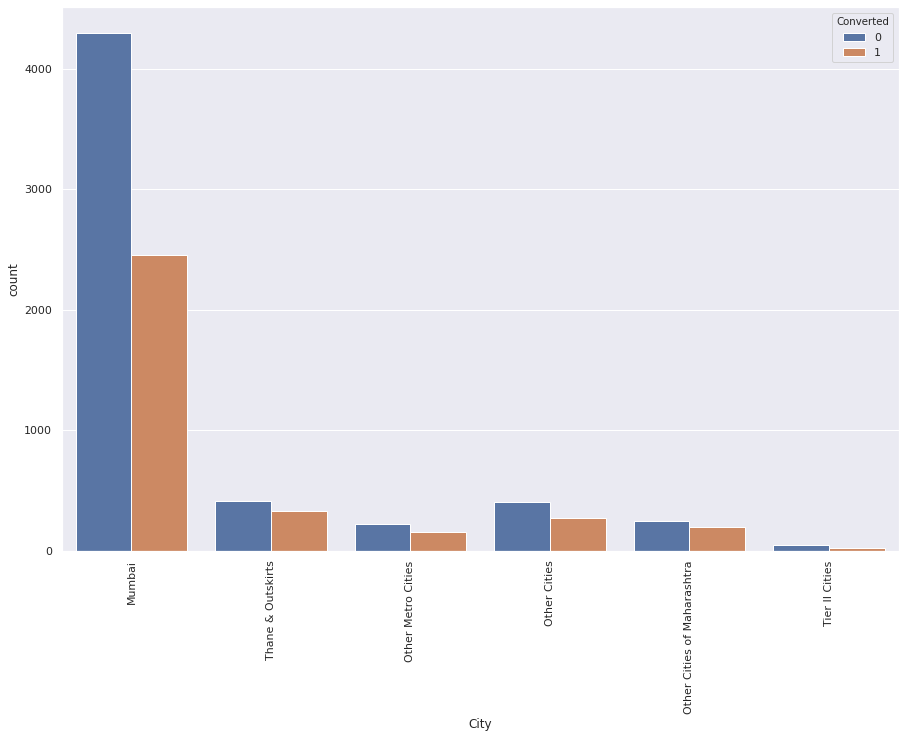

In [131]:
plt.figure(figsize=(15,10))
sns.countplot(x = "City", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [132]:
lead_df['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [133]:
lead_df['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

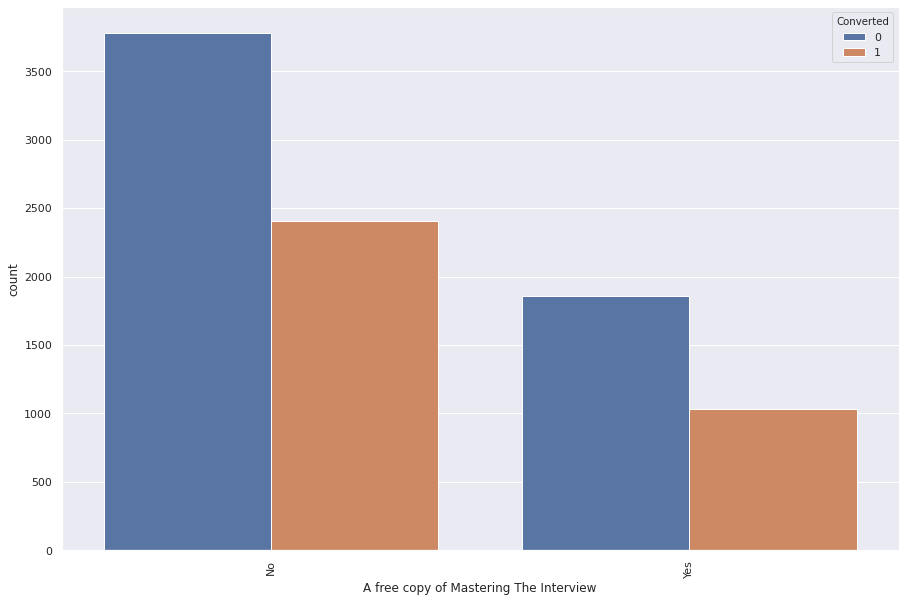

In [134]:
plt.figure(figsize=(15,10))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [135]:
lead_df['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

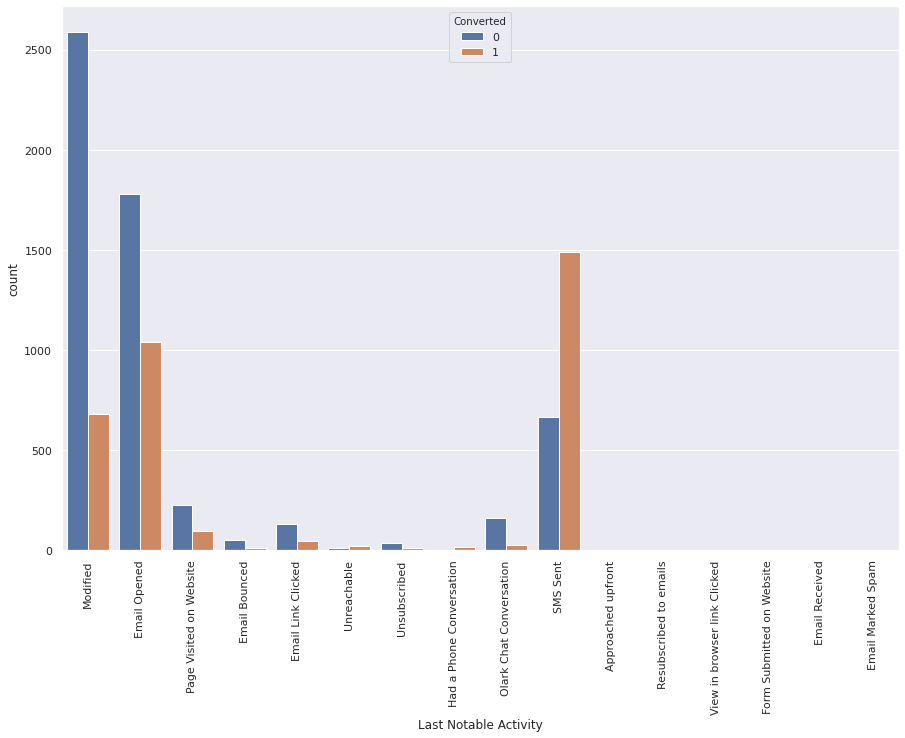

In [136]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [137]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India     Other_Specialization                      Unemployed   
1   India     Other_Specialization                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India     Other_Specialization                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

          Lead Profile    City I agree to pay the amount through cheque  \
0  LeadProfile_NotSure  Mumbai                                       No   
1  LeadProfile_NotSure  Mumbai           

### From the above analysis we can conclude that the below columns can be dropped as they are insignificant towards lead conversions

In [138]:
lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 
                       'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 
                       'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'], 1)

In [139]:
lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality         Lead Profile  \
0          Interested in other courses  Low in Relevance  LeadProfile_NotSure   
1                              Ringing          Not Sure  LeadProfile_NotSure   
2  Will revert after reading the email          Might be       Potential Lead   
3                              Ringing          Not Sure  LeadProfile_NotSure   
4  Will revert after reading the email          Might be  LeadProfile_NotSure   

     City Last Notable Activity  
0  Mumbai              Modified  
1  Mumbai          Email Opened  
2  Mumbai          Email Opened  
3  Mumbai              Modified  
4  Mumbai              Modified

In [140]:
#create dummies for categorical columns
lead_dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality', 'Lead Profile','City','Last Notable Activity']], drop_first=True)
lead_dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Other_source  \
0                           0                         0   
1                           1                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_LastActivity  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1  

In [141]:
#Concatinating dummies with original dataset
lead_df = pd.concat([lead_df, lead_dummy], axis = 1)
lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality         Lead Profile  \
0          Interested in other courses  Low in Relevance  LeadProfile_NotSure   
1                              Ringing          Not Sure  LeadProfile_NotSure   
2  Will revert after reading the email          Might be       Potential Lead   
3                              Ringing          Not Sure  LeadProfile_NotSure   
4  Will revert after reading the email          Might be  LeadProfile_NotSure   

     City Last Notable Activity  Lead Origin_Landing Page Submission  \
0  Mumbai              Modified                                    0   
1  Mumbai          Email Opened                                    0   
2  Mumbai          Email Opened                                    1   
3  Mumbai              Modified                                    1   
4  Mumbai              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
0                          0                        0                   0   
1                          0                        0                   0   
2                          0                        0                   0   
3                          0                        0                   0   
4                          0                        0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_source  Lead Source_Reference  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                      

In [142]:
#Dropping repeated variables
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                  'Tags','Lead Quality', 'Lead Profile','City','Last Notable Activity'], axis = 1)
lead_df.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Other_source  \
0                           0                         0   
1                           1                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_LastActivity  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   Last Activity_Page Visited on Website

**Now the dataset is prepared for model buiding**

In [143]:
### Train test Split to build the model

In [144]:

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
0                          0                        0                   0   
1                          0                        0                   0   
2                          0                        0                   0   
3                          0                        0                   0   
4                          0                        0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_source  Lead Source_Reference  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_LastActivity  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   


In [145]:
# Putting response variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [146]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.150296   
1012             1            0    -0.432779                    -0.543632   
9226             0            0    -1.150329                    -0.904666   
4750             0            0    -0.432779                     1.717578   
7987             0            0     0.643547                     2.053909   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
3009                          0                        0                   0   
1012                          0                        0                   0   
9226                          0                        0                   0   
4750                          0                        0                   0   
7987                          0                        0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
3009                       0                           0   
1012                       0                           0   
9226                       1                           0   
4750                       0                           0   
7987                       0                           0   

      Lead Source_Other_source  Lead Source_Reference  \
3009                         0                      0   
1012                         0                      0   
9226                         0                      0   
4750                         0                      0   
7987                         0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
3009                           0                             0   
1012                           0                             0   
9226                           0                             0   
4750                           0                             0   
7987                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3009                            0                                 0   
1012                            1                                 0   
9226                            0                                 0   
4750                            0                                 0   
7987                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
3009                           1                                        0   
1012                           0                                        0   
9226                           0                                        0   
4750                           0                                        0   
7987                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_LastActivity  \
3009                                      0                                 0   
1012                                      0                                 0   
9226                                      0                                 0   
4750                                      0                                 0   
7987                                      0                                 0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3009                                      0                       0   
1012                                   

In [148]:
#Conversion Rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

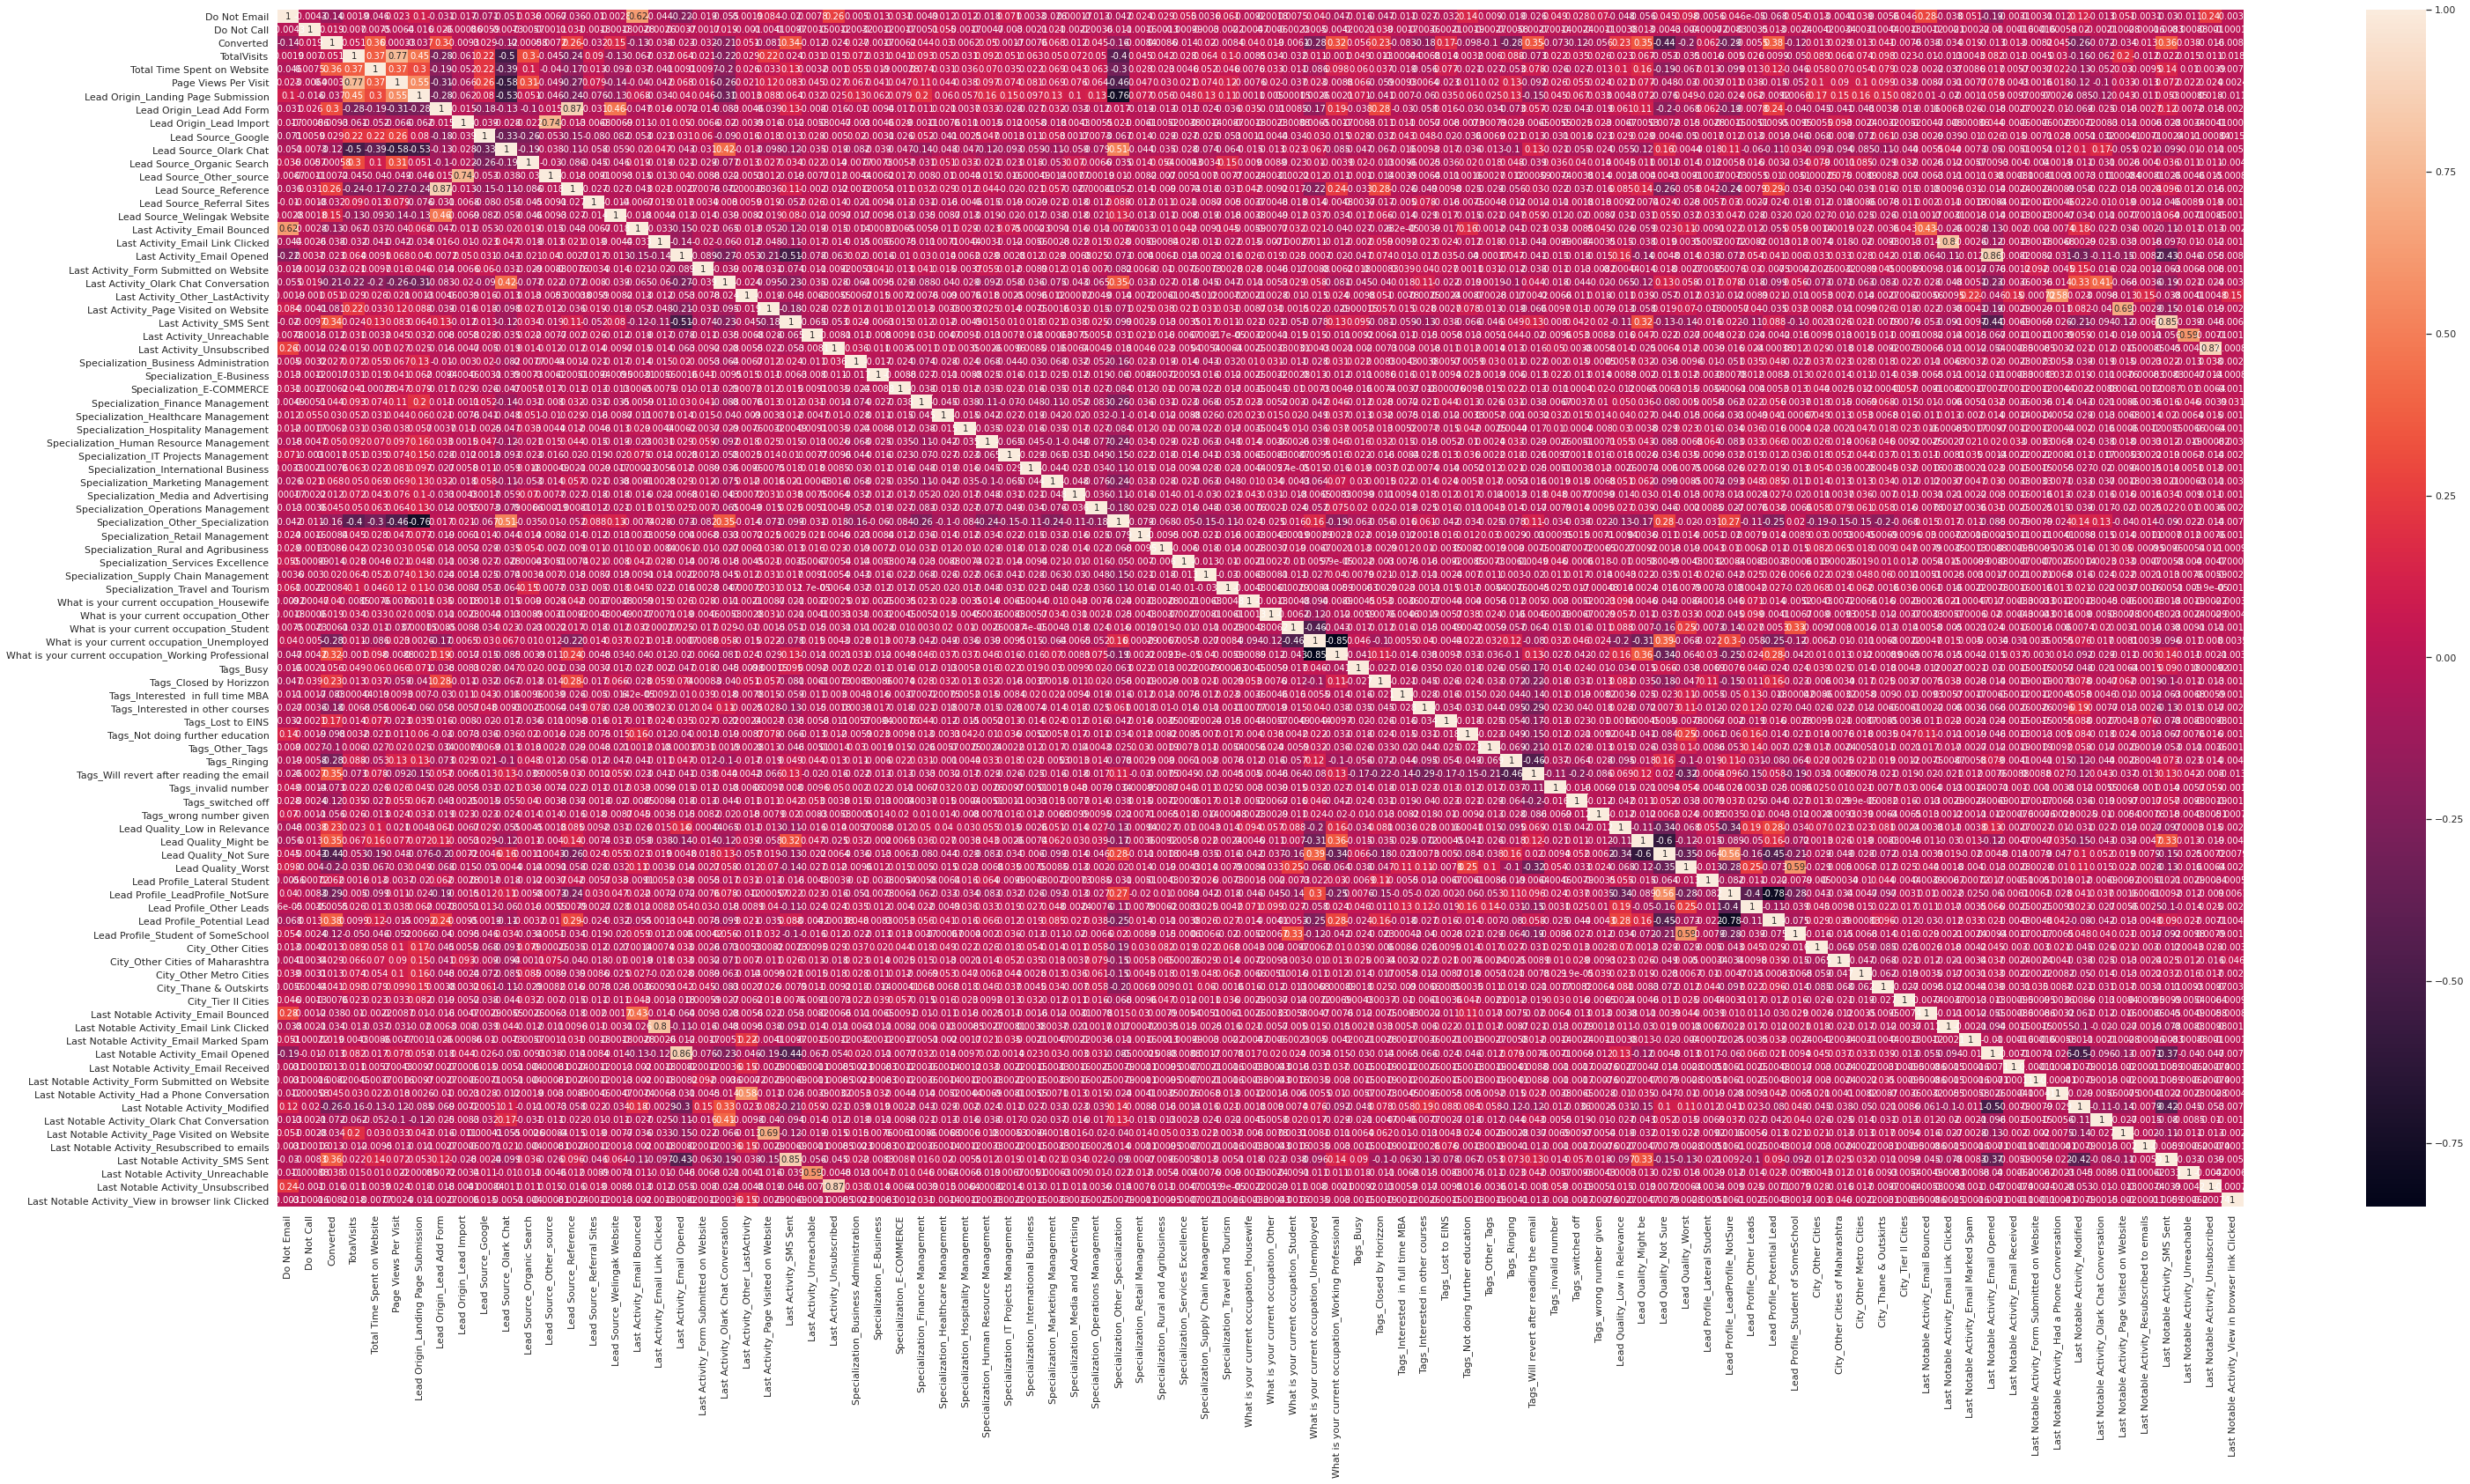

In [149]:
#correlation matrix 
plt.figure(figsize = (50,25))
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

### Model Building

In [150]:
#First Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1202.0
Date:                Sun, 26 Apr 2020   Deviance:                       2404.1
Time:                        04:55:15   Pearson chi2:                 2.21e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   43.6387   2.23e+05      0.000      1.000   -4.37e+05    4.37e+05
Do Not Email                                            -1.2266      0.335     -3.661      0.000      -1.883      -0.570
Do Not Call                                             23.7079   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                              0.2079      0.089      2.329      0.020       0.033       0.383
Total Time Spent on Website                              1.1775      0.066     17.953      0.000       1.049       1.306
Page Views Per Visit                                    -0.3059      0.102     -3.010      0.003      -0.505      -0.107
Lead Origin_Landing Page Submission                     -0.7766      0.228     -3.400      0.001      -1.224      -0.329
Lead Origin_Lead Add Form                                0.1060      1.311      0.081      0.936      -2.464       2.676
Lead Origin_Lead Import                                  1.2914      1.226      1.053      0.292      -1.112       3.695
Lead Source_Google                                       0.2190      0.159      1.374      0.170      -0.093       0.532
Lead Source_Olark Chat                                   1.0021      0.240      4.178      0.000       0.532       1.472
Lead Source_Organic Search                               0.1418      0.216      0.656      0.512      -0.282       0.565
Lead Source_Other_source                                 0.0520      0.885      0.059      0.953      -1.682       1.786
Lead Source_Reference                                    1.0914      1.370      0.797      0.426      -1.594       3.777
Lead Source_Referral Sites                              -0.0688      0.501     -0.137      0.891      -1.050       0.912
Lead Source_Welingak Website                             4.9777      1.507      3.304      0.001       2.025       7.931
Last Activity_Email Bounced                             -0.6646      0.899     -0.739      0.460      -2.428       1.098
Last Activity_Email Link Clicked                         0.8701      0.645      1.349      0.177      -0.394       2.134
Last Activity_Email Opened                               0.0320      0.390      0.082      0.935      -0.733       0.797
Last Activity_Form Submitted on Website                  0.1474      0.623      0.237      0.813      -1.073       1.368
Last Activity_Olark Chat Conversation                   -0.5330      0.398     -1.338      0.181      -1.314       0.248
Last Activity_Other_LastActivity                         1.4430      1.166      1.237      0.216      -0.843       3.729
Last Activity_Page Visited on Website                    0

### Feature Selection Using RFE

In [151]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [152]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 29),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 46),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 57),
 ('Lead Source_Other_source', False, 64),
 ('Lead Source_Reference', False, 54),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 31),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Opened', False, 61),
 ('Last Activity_Form Submitted on Website', False, 74),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Other_LastActivity', False, 10),
 ('Last Activity_Page Visited on Website', False, 49),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activi

In [153]:
#Identifying columns which is supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Lead Profile_LeadProfile_NotSure',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [154]:
#Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_LastActivity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality

**Assessing the model with StatsModels**

In [155]:
X_train_sm = sm.add_constant(X_train[col]) #adding constant
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1513.3
Date:                Sun, 26 Apr 2020   Deviance:                       3026.5
Time:                        04:55:28   Pearson chi2:                 1.97e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1417      0.216     -5.294      0.000      -1.564      -0.719
Do Not Email                                            -1.2504      0.218     -5.736      0.000      -1.678      -0.823
Lead Source_Welingak Website                             4.4899      0.737      6.095      0.000       3.046       5.934
What is your current occupation_Working Professional     1.2285      0.296      4.149      0.000       0.648       1.809
Tags_Busy                                                3.6938      0.333     11.107      0.000       3.042       4.346
Tags_Closed by Horizzon                                  8.5222      0.770     11.061      0.000       7.012      10.032
Tags_Lost to EINS                                        9.5180      0.766     12.429      0.000       8.017      11.019
Tags_Ringing                                            -1.3432      0.340     -3.950      0.000      -2.010      -0.677
Tags_Will revert after reading the email                 4.2430      0.247     17.164      0.000       3.759       4.728
Tags_invalid number                                    -21.4889   1.39e+04     -0.002      0.999   -2.73e+04    2.72e+04
Tags_switched off                                       -1.8977      0.614     -3.089      0.002      -3.102      -0.694
Tags_wrong number given                                -21.4610   1.93e+04     -0.001      0.999   -3.79e+04    3.79e+04
Lead Quality_Not Sure                                   -2.5758      0.138    -18.641      0.000      -2.847      -2.305
Lead Quality_Worst                                      -3.9384      0.730     -5.393      0.000      -5.370      -2.507
Lead Profile_LeadProfile_NotSure                        -2.0728      0.182    -11.419      0.000      -2.429      -1.717
Last Notable Activity_SMS Sent                           2.9324      0.124     23.664      0.000       2.690       3.175
========================================================================================================================
"""

In [156]:
#Since P-value of 'Tags_invalid_number' is greater than 0.5,dropping it
col1 = col.drop('Tags_invalid number',1)
col1

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Lead Profile_LeadProfile_NotSure',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [157]:
#Running model after removing high p-value column
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1516.4
Date:                Sun, 26 Apr 2020   Deviance:                       3032.7
Time:                        04:55:28   Pearson chi2:                 2.04e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2331      0.216     -5.721      0.000      -1.656      -0.811
Do Not Email                                            -1.2490      0.218     -5.736      0.000      -1.676      -0.822
Lead Source_Welingak Website                             4.4885      0.737      6.094      0.000       3.045       5.932
What is your current occupation_Working Professional     1.2515      0.298      4.199      0.000       0.667       1.836
Tags_Busy                                                3.8250      0.329     11.613      0.000       3.179       4.471
Tags_Closed by Horizzon                                  8.6475      0.770     11.231      0.000       7.138      10.157
Tags_Lost to EINS                                        9.6437      0.765     12.601      0.000       8.144      11.144
Tags_Ringing                                            -1.2071      0.336     -3.592      0.000      -1.866      -0.548
Tags_Will revert after reading the email                 4.3709      0.244     17.887      0.000       3.892       4.850
Tags_switched off                                       -1.7565      0.613     -2.865      0.004      -2.958      -0.555
Tags_wrong number given                                -20.3309   1.17e+04     -0.002      0.999    -2.3e+04     2.3e+04
Lead Quality_Not Sure                                   -2.5667      0.138    -18.638      0.000      -2.837      -2.297
Lead Quality_Worst                                      -3.9393      0.730     -5.394      0.000      -5.371      -2.508
Lead Profile_LeadProfile_NotSure                        -2.1158      0.182    -11.652      0.000      -2.472      -1.760
Last Notable Activity_SMS Sent                           2.9087      0.123     23.707      0.000       2.668       3.149
========================================================================================================================
"""

In [158]:
#Since P-value of 'Tags_wrong number given' is greater than 0.5, dropping it
col2 = col1.drop('Tags_wrong number given',1)
col2

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_LeadProfile_NotSure', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [159]:
#Running the model after dropping 'Tags_wrong number given'
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1517.9
Date:                Sun, 26 Apr 2020   Deviance:                       3035.7
Time:                        04:55:28   Pearson chi2:                 2.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2829      0.215     -5.969      0.000      -1.704      -0.862
Do Not Email                                            -1.2488      0.218     -5.738      0.000      -1.675      -0.822
Lead Source_Welingak Website                             4.4884      0.737      6.094      0.000       3.045       5.932
What is your current occupation_Working Professional     1.2627      0.299      4.221      0.000       0.676       1.849
Tags_Busy                                                3.8868      0.328     11.852      0.000       3.244       4.530
Tags_Closed by Horizzon                                  8.7040      0.769     11.312      0.000       7.196      10.212
Tags_Lost to EINS                                        9.6989      0.765     12.681      0.000       8.200      11.198
Tags_Ringing                                            -1.1448      0.335     -3.422      0.001      -1.800      -0.489
Tags_Will revert after reading the email                 4.4304      0.243     18.231      0.000       3.954       4.907
Tags_switched off                                       -1.6938      0.612     -2.766      0.006      -2.894      -0.494
Lead Quality_Not Sure                                   -2.5684      0.138    -18.668      0.000      -2.838      -2.299
Lead Quality_Worst                                      -3.9209      0.732     -5.353      0.000      -5.357      -2.485
Lead Profile_LeadProfile_NotSure                        -2.1233      0.181    -11.699      0.000      -2.479      -1.768
Last Notable Activity_SMS Sent                           2.9006      0.122     23.725      0.000       2.661       3.140
========================================================================================================================
"""

In [160]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.175925
1012    0.177947
9226    0.000809
4750    0.795177
7987    0.976439
1281    0.980636
2880    0.175925
4971    0.692727
7536    0.958809
1248    0.000809
dtype: float64

In [161]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.75925212e-01, 1.77947088e-01, 8.08659712e-04, 7.95176868e-01,
       9.76438823e-01, 9.80636209e-01, 1.75925212e-01, 6.92727190e-01,
       9.58809141e-01, 8.08659712e-04])

In [162]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.175925         3009
1          0        0.177947         1012
2          0        0.000809         9226
3          1        0.795177         4750
4          1        0.976439         7987

In [163]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted
0          0        0.175925         3009          0
1          0        0.177947         1012          0
2          0        0.000809         9226          0
3          1        0.795177         4750          1
4          1        0.976439         7987          1

In [164]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3752  153]
 [ 338 2108]]


In [165]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9226893402613762


In [166]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
# Creating dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                   Lead Profile_LeadProfile_NotSure  4.48
7            Tags_Will revert after reading the email  3.38
6                                        Tags_Ringing  1.65
2   What is your current occupation_Working Profes...  1.24
9                               Lead Quality_Not Sure  1.13
3                                           Tags_Busy  1.12
0                                        Do Not Email  1.11
4                             Tags_Closed by Horizzon  1.07
5                                   Tags_Lost to EINS  1.06
12                     Last Notable Activity_SMS Sent  1.06
8                                   Tags_switched off  1.05
1                        Lead Source_Welingak Website  1.04
10                                 Lead Quality_Worst  1.02

In [168]:
#checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9226893402613762


In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
#Getting sensitivity of our logistic regression model
TP / float(TP+FN)

0.8618152085036794

In [171]:
#calculating specificity
TN / float(TN+FP)

0.9608194622279129

In [172]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.03918053777208707


In [173]:
# positive predictive value 
print (TP / float(TP+FP))

0.9323308270676691


In [174]:
# Negative predictive value
print (TN / float(TN+ FN))

0.917359413202934


### Plotting the ROC Curve

In [175]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [176]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

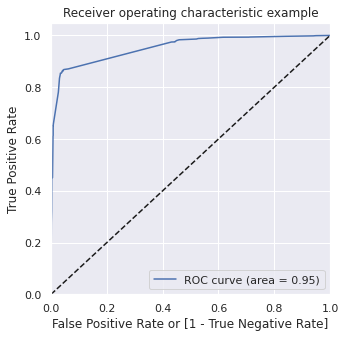

In [177]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Since the curve follows the left-hand border and then the top border of the ROC space very closely, the test is very much accurate.

In [178]:
#creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.175925         3009          0    1    1    0    0    0   
1          0        0.177947         1012          0    1    1    0    0    0   
2          0        0.000809         9226          0    1    0    0    0    0   
3          1        0.795177         4750          1    1    1    1    1    1   
4          1        0.976439         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    1    1    1    1    1

In [179]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.711384  0.983238  0.541101
0.2   0.2  0.912612  0.870401  0.939052
0.3   0.3  0.920957  0.867539  0.954417
0.4   0.4  0.921430  0.865086  0.956722
0.5   0.5  0.922689  0.861815  0.960819
0.6   0.6  0.921430  0.854456  0.963380
0.7   0.7  0.917966  0.835241  0.969782
0.8   0.8  0.863014  0.657400  0.991805
0.9   0.9  0.861282  0.651676  0.992574


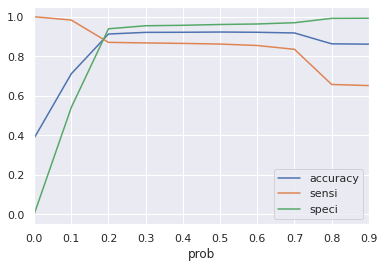

In [180]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [181]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.175925         3009          0    1    1    0    0    0   
1          0        0.177947         1012          0    1    1    0    0    0   
2          0        0.000809         9226          0    1    0    0    0    0   
3          1        0.795177         4750          1    1    1    1    1    1   
4          1        0.976439         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    0    0                1  
4    1    1    1    1    1                1

In [182]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.175925         3009          0    1    1    0    0    0   
1          0        0.177947         1012          0    1    1    0    0    0   
2          0        0.000809         9226          0    1    0    0    0    0   
3          1        0.795177         4750          1    1    1    1    1    1   
4          1        0.976439         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          18  
1    0    0    0    0    0                0          18  
2    0    0    0    0    0                0           0  
3    1    1    1    0    0                1          80  
4    1    1    1    1    1                1          98

In [183]:
#checking accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1, 1] # true positive 
TN = confusion2[0, 0]# true negatives
FP = confusion2[0, 1]# false positives
FN = confusion2[1, 0]# false negatives

In [184]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8704006541291905

In [185]:
# calculating specificity
TN / float(TN+FP)

0.9390524967989756

In [186]:
# Calculating false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.06094750320102433


In [187]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8994507815800592


In [188]:
# Negative predictive value
print (TN / float(TN+FN))

0.9204317269076305


### Precision and Recall

In [189]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3752,  153],
       [ 338, 2108]])

In [190]:
#precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9323308270676691

In [191]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8618152085036794

- Using sklearn utils

In [192]:
from sklearn.metrics import precision_score, recall_score

In [193]:
#precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9323308270676691

In [194]:
#recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8618152085036794

##### Since we see the recall value is 0.86, it is well over the expected 80% conversion rate

### Precision and recall tradeoff

In [195]:
from sklearn.metrics import precision_recall_curve

In [196]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [197]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

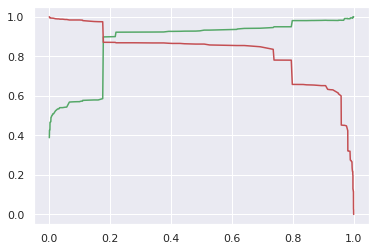

In [198]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [199]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.150296   
1012             1            0    -0.432779                    -0.543632   
9226             0            0    -1.150329                    -0.904666   
4750             0            0    -0.432779                     1.717578   
7987             0            0     0.643547                     2.053909   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
3009                          0                        0                   0   
1012                          0                        0                   0   
9226                          0                        0                   0   
4750                          0                        0                   0   
7987                          0                        0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
3009                       0                           0   
1012                       0                           0   
9226                       1                           0   
4750                       0                           0   
7987                       0                           0   

      Lead Source_Other_source  Lead Source_Reference  \
3009                         0                      0   
1012                         0                      0   
9226                         0                      0   
4750                         0                      0   
7987                         0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
3009                           0                             0   
1012                           0                             0   
9226                           0                             0   
4750                           0                             0   
7987                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3009                            0                                 0   
1012                            1                                 0   
9226                            0                                 0   
4750                            0                                 0   
7987                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
3009                           1                                        0   
1012                           0                                        0   
9226                           0                                        0   
4750                           0                                        0   
7987                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_LastActivity  \
3009                                      0                                 0   
1012                                      0                                 0   
9226                                      0                                 0   
4750                                      0                                 0   
7987                                      0                                 0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3009                                      0                       0   
1012                                   

In [200]:
X_test = X_test[col2]
X_test.head()

Do Not Email  Lead Source_Welingak Website  \
3271             0                             0   
1490             0                             0   
7936             0                             0   
4216             0                             0   
3830             0                             0   

      What is your current occupation_Working Professional  Tags_Busy  \
3271                                                  0             0   
1490                                                  1             0   
7936                                                  0             0   
4216                                                  0             0   
3830                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
3271                        0                  0             0   
1490                        0                  0             0   
7936                        0                  0             0   
4216                        1                  0             0   
3830                        0                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3271                                         1                  0   
1490                                         1                  0   
7936                                         1                  0   
4216                                         0                  0   
3830                                         1                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
3271                      1                   0   
1490                      0                   0   
7936                      1                   0   
4216                      0                   0   
3830                      1                   0   

      Lead Profile_LeadProfile_NotSure  Last Notable Activity_SMS Sent  
3271                                 1                               0  
1490                                 0                               0  
7936                                 1                               0  
4216                                 0                               0  
3830                                 1                               0

In [201]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [202]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.175925
1490    0.987993
7936    0.175925
4216    0.999402
3830    0.175925
1800    0.987993
6507    0.014504
4821    0.000467
4223    0.980636
4714    0.175925
dtype: float64

In [203]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
3271  0.175925
1490  0.987993
7936  0.175925
4216  0.999402
3830  0.175925

In [204]:
y_test_df = pd.DataFrame(y_test)

In [205]:
#Setting Prospect ID as index
y_test_df['Prospect ID'] = y_test_df.index

In [206]:
#removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
#appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.175925
1          1         1490  0.987993
2          0         7936  0.175925
3          1         4216  0.999402
4          0         3830  0.175925

In [208]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [209]:
pd.__version__

'0.25.3'

In [210]:
#rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

Prospect ID  Converted  Converted_prob
0         3271          0        0.175925
1         1490          1        0.987993
2         7936          0        0.175925
3         4216          1        0.999402
4         3830          0        0.175925

In [211]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         3271          0        0.175925                0
1         1490          1        0.987993                1
2         7936          0        0.175925                0
3         4216          1        0.999402                1
4         3830          0        0.175925                0

In [212]:
#Checking accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9078222548659567

In [213]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1618,  116],
       [ 135,  854]])

In [214]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [215]:
#Determining sensitivity of our logistic regression model
TP / float(TP+FN)

0.8634984833164813

In [216]:
#calculating specificity
TN / float(TN+FP)

0.9331026528258363

In [217]:
#Calculating Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8618152085036794

#### Again we see recall of 86% which is much better than the expected conversion rate of 80%

In [218]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         3271          0        0.175925                0
1         1490          1        0.987993                1
2         7936          0        0.175925                0
3         4216          1        0.999402                1
4         3830          0        0.175925                0

In [219]:
#Assigning lead score
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
0         3271          0        0.175925                0          18
1         1490          1        0.987993                1          99
2         7936          0        0.175925                0          18
3         4216          1        0.999402                1         100
4         3830          0        0.175925                0          18

In [220]:
y_pred_final.sort_values('Lead_Score', ascending = False, inplace = True)

In [221]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
1361         2118          1        0.999402                1         100
869          3739          1        0.999402                1         100
685           112          1        0.999831                1         100
679          2680          1        0.999332                1         100
2546         1682          1        0.999402                1         100

In [222]:
y_pred_final.reset_index(inplace = True)

In [223]:
#filtering out the potential leads based on our model
potential_leads = y_pred_final[y_pred_final['final_predicted'] == 1]

In [224]:
#top 5 potential leads
potential_leads.head()

index  Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
0   1361         2118          1        0.999402                1         100
1    869         3739          1        0.999402                1         100
2    685          112          1        0.999831                1         100
3    679         2680          1        0.999332                1         100
4   2546         1682          1        0.999402                1         100

In [225]:
#Conversion rate
conversion_rate = (sum(potential_leads['Converted'])/len(potential_leads['Converted'].index)) * 100
conversion_rate

88.04123711340206

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

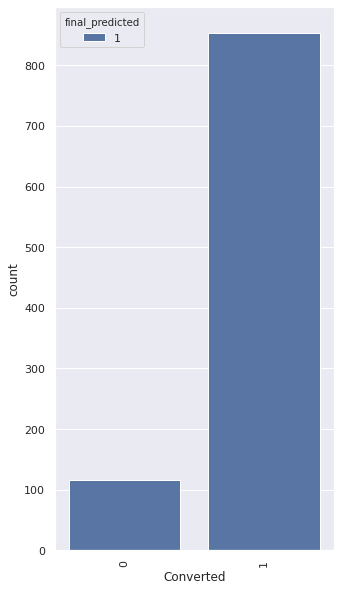

In [226]:
plt.figure(figsize=(5,10))
sns.countplot(x = "Converted", hue = "final_predicted", data = potential_leads)
plt.xticks(rotation = 90)